<a href="https://colab.research.google.com/github/DSabarish/Practice/blob/main/Sabarish_Aerofit_Business_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎯 Aerofit - Descriptive Statistics & Probability**

### 🏋️**About Aerofit**
Aerofit is a leading brand in fitness equipment, offering products like:
- Treadmills
- Exercise bikes
- Gym equipment
- Fitness accessories

### 📌 **Problem Statement**
**Identify the target audience characteristics for each type of treadmill offered by AeroFit.**

### **🛠️ Business Problem**
The market research team wants to understand the customer characteristics for each treadmill product:

- **KP281:** Entry-level treadmill ($1,500)

- **KP481:** Mid-level runners treadmill ($1,750)

- **KP781:** Advanced features treadmill ($2,500)

### **🎯 Objectives**
1. **Descriptive Analytics:** Create customer profiles for each treadmill product.
2. **Probability Analysis:** Construct two-way contingency tables, compute conditional and marginal probabilities.
3. **Business Insights:** Provide actionable recommendations based on data analysis.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame


<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sabar\AppData\Local\Temp\ipykernel_19428\3621263686.py:14: SyntaxWarning: invalid escape sequence '\c'
  return "\centering{%s}" % self.to_latex()


<U><B><font size="6" face="Times New Roman">1. Descriptive Analytics</font></B></U>

In [ ]:
# Loading Data
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
df=pd.read_csv(url)
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### 📊 Dataset
**Collected data on individuals who purchased a treadmill in the past three months:**
- **Product Purchased:** KP281, KP481, KP781
- **Age:** In years
- **Gender:** Male/Female
- **Education:** In years
- **Marital Status:** Single/Partnered
- **Usage:** Average weekly treadmill usage
- **Income:** Annual income ($)
- **Fitness:** Self-rated fitness (1 to 5 scale)
- **Miles:** Average weekly miles expected to walk/run


#### Shape of Data

In [ ]:
rows = df.shape[0]
cols = df.shape[1]
output = f'Number of rows: {rows}, Number of columns: {cols}'
print(output)

Number of rows: 180, Number of columns: 9


In [ ]:
df[:5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### Check for Missing Values

In [ ]:
df.isnull().sum() # no null values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values

#### Check for Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Summary Statistics for Each Feature

In [ ]:
df.describe(include ='int').T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


## 📊 Outlier Detection and Data Quality Issue Resolution for Each Feature Using Z Score 🔍

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
def detect_outliers(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = pd.DataFrame()

    for col in numeric_cols:
        mean = df[col].mean()
        std = df[col].std()
        z_scores[col] = (df[col] - mean) / std

    outliers = (z_scores.abs() > threshold)
    return outliers

# Defining a new meaning full parameter to understand Miles
df["Miles_Per_Day"] = df["Miles"] / df["Usage"]

outliers = detect_outliers(df)

# Display columns with outliers
outliers_summary = outliers.any(axis=0)
print("Columns with outliers:")
print(outliers_summary[outliers_summary])

# Display rows with outliers
outlier_rows = outliers.any(axis=1)
print(f"Number of rows with outliers: {outlier_rows.sum()}")

Columns with outliers:
Age              True
Education        True
Usage            True
Income           True
Miles            True
Miles_Per_Day    True
dtype: bool
Number of rows with outliers: 12


In [ ]:
# Number of rows with outliers in each column
for cols in outliers.columns:
    print("~"*50)
    print(outliers[cols].value_counts())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Age
False    179
True       1
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Education
False    177
True       3
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Usage
False    178
True       2
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Fitness
False    180
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Income
False    177
True       3
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Miles
False    176
True       4
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Miles_Per_Day
False    179
True       1
Name: count, dtype: int64


In [ ]:
# Display rows where 'Age' is an outlier
print("Outliers in 'Age':")
df[outliers["Age"]]

Outliers in 'Age':


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Miles_Per_Day
79,KP281,50,Female,16,Partnered,3,3,64809,66,22.0


> Decision based on domain knowledge:<br>
It is common for customers aged 50 to purchase treadmills.<br>
Therefore, we will not consider this age as an outlier.

In [ ]:
# Display rows where 'Education' is an outlier
df[outliers["Education"]]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Miles_Per_Day
157,KP781,26,Female,21,Single,4,3,69721,100,25.000000
161,KP781,27,Male,21,Partnered,4,4,90886,100,25.000000
175,KP781,40,Male,21,Single,6,5,83416,200,33.333333


> Decision based on domain knowledge:<br>
It is normal to have education years of 21 years.<br>
Therefore, we will ignore this as an outlier.<br>

In [ ]:
# Display rows where 'Usage' is an outlier
df[outliers["Usage"]]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Miles_Per_Day
163,KP781,28,Male,18,Partnered,7,5,77191,180,25.714286
166,KP781,29,Male,14,Partnered,7,5,85906,300,42.857143


> It is normal for any customer to use a treadmill 7 days a week.<br>
Decision to Drop/Impute/Cap/Ignore: Ignore

In [ ]:
# Display rows where 'Income' is an outlier
df[outliers["Income"]]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Miles_Per_Day
168,KP781,30,Male,18,Partnered,5,4,103336,160,32.0
174,KP781,38,Male,18,Partnered,5,5,104581,150,30.0
178,KP781,47,Male,18,Partnered,4,5,104581,120,30.0


Since there is no upper cap for Income, lets compare with the median salary.

In [ ]:
# Extract outlier income values
outlier_income_values = df[outliers["Income"]]["Income"]

# Calculate the median income
median_income = df["Income"].median()

# Calculate the percentage difference
percentage_difference = round(((outlier_income_values - median_income) / median_income) * 100,2)

# source : https://en.wikipedia.org/wiki/Median_absolute_deviation
print("Comparing the median income:")
print(f"Median Income: {median_income}")
print(f"Outlier Income Values: {list(outlier_income_values.values)}")
print(f"Percentage Difference: {list(percentage_difference)}")



Comparing the median income:
Median Income: 50596.5
Outlier Income Values: [103336, 104581, 104581]
Percentage Difference: [104.24, 106.7, 106.7]


>With domain knowledge and considering a universal population set, <br>
We can interpret a 100% difference from the median salary as normal and practical.

In [ ]:
# Display rows where 'Miles' is an outlier
df[outliers["Miles"]]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Miles_Per_Day
166,KP781,29,Male,14,Partnered,7,5,85906,300,42.857143
167,KP781,30,Female,16,Partnered,6,5,90886,280,46.666667
170,KP781,31,Male,16,Partnered,6,5,89641,260,43.333333
173,KP781,35,Male,16,Partnered,4,5,92131,360,90.000000


>Checking outliers in Miles columns will lead to irrational results.<br>
We have to check for the outliers in the Miles_Per_Day columns as it denotes the rate of usage

In [ ]:
# Display rows where 'Miles_Per_Day' is an outlier
df[outliers["Miles_Per_Day"]]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Miles_Per_Day
173,KP781,35,Male,16,Partnered,4,5,92131,360,90.0


In [ ]:
# Extract outlier miles values
outlier_miles_values = df[outliers["Miles_Per_Day"]]["Miles_Per_Day"]

# Calculate the median miles
median_miles = df["Miles_Per_Day"].median()

# Calculate the percentage difference
percentage_difference = round(((outlier_miles_values - median_miles) / median_miles) * 100, 2)

# Print the comparison results
print("Comparing the median miles:")
print(f"Median Miles: {median_miles}")
print(f"Outlier Miles Values: {list(outlier_miles_values.values)}")
print(f"Percentage Difference: {list(percentage_difference)}")



Comparing the median miles:
Median Miles: 28.333333333333332
Outlier Miles Values: [90.0]
Percentage Difference: [217.65]


>This is an outlier.<br>
The percentage difference from the median miles per day indicates a significant deviation (200%) from the typical value.

<Axes: xlabel='Miles_Per_Day', ylabel='Count'>

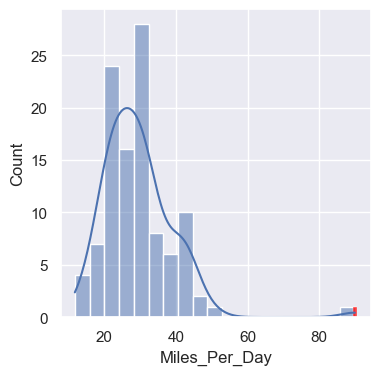

In [ ]:
# Visualising Outliers
sns.set(rc={'figure.figsize':(4, 4)})
sns.histplot(df[df["MaritalStatus"] == "Partnered"]["Miles_Per_Day"], kde=True)
sns.histplot(outlier_miles_values, kde=False, color='red', label='Outliers') ## Highlight outliers

> Decision: to cap-off this "Red" data point, unless new evidence comes up to make this decision wrong

In [ ]:
# Decision: to cap-off this data point, unless new evidence comes up to make this decision wrong
cap = ~outliers["Miles_Per_Day"]
df_cap = df.loc[cap]
# Display DataFrame after capping outliers
df_cap

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Miles_Per_Day
0,KP281,18,Male,14,Single,3,4,29562,112,37.333333
1,KP281,19,Male,15,Single,2,3,31836,75,37.500000
2,KP281,19,Female,14,Partnered,4,3,30699,66,16.500000
3,KP281,19,Male,12,Single,3,3,32973,85,28.333333
4,KP281,20,Male,13,Partnered,4,2,35247,47,11.750000
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,33.333333
176,KP781,42,Male,18,Single,5,4,89641,200,40.000000
177,KP781,45,Male,16,Single,5,5,90886,160,32.000000
178,KP781,47,Male,18,Partnered,4,5,104581,120,30.000000


<Axes: xlabel='Miles_Per_Day', ylabel='Count'>

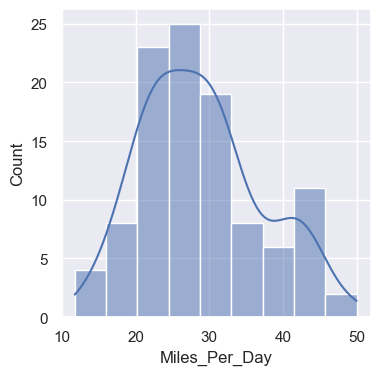

In [ ]:
# Visualising Outliers
# Extract outlier miles values
outlier_miles_values = df_cap.loc[outliers["Miles_Per_Day"]]["Miles_Per_Day"]
sns.set(rc={'figure.figsize':(4, 4)})
sns.histplot(df_cap[df_cap["MaritalStatus"] == "Partnered"]["Miles_Per_Day"], kde=True)
sns.histplot(outlier_miles_values, kde=False, color='red', label='Outliers') ## Highlight outliers

In [ ]:
# After Outlier Handaling, checking for the shape of the data set
rows = df_cap.shape[0]
cols = df_cap.shape[1]
output = f'Number of rows: {rows}, Number of columns: {cols}'
print(output)

# Assigning the final dataframe to new variable
data = df_cap

Number of rows: 179, Number of columns: 10


# 📋 Non-Graphical Analysis:
## 🔢 Value Counts and Unique Attributes

In [ ]:
columns_to_analyze = ["Product", "Age", "Gender", "MaritalStatus"]

for column in columns_to_analyze:
    unique_values = df[column].unique()
    num_unique_values = df[column].nunique()
    value_counts_normalized = df[column].value_counts(normalize=True) * 100

    print(f"##~~~~~~ Analysis of {column} ~~~~~~##")
    print(f"Unique values in {column}:\n{unique_values}")
    print(f"Number of unique values in {column}: {num_unique_values}")
    print(f"Normalized value counts for {column} (%):\n{value_counts_normalized}")
    print("\n")

##~~~~~~ Analysis of Product ~~~~~~##
Unique values in Product:
['KP281' 'KP481' 'KP781']
Number of unique values in Product: 3
Normalized value counts for Product (%):
Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64


##~~~~~~ Analysis of Age ~~~~~~##
Unique values in Age:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Number of unique values in Age: 32
Normalized value counts for Age (%):
Age
25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
35     4.444444
33     4.444444
30     3.888889
38     3.888889
21     3.888889
22     3.888889
27     3.888889
31     3.333333
34     3.333333
29     3.333333
20     2.777778
40     2.777778
32     2.222222
19     2.222222
48     1.111111
37     1.111111
45     1.111111
47     1.111111
46     0.555556
50     0.555556
18     0.555556
44     0.555556
43     0.555556
41     0.555556
39     0.555556
36     0.555556
42  

#### Inference:
**Market Customer Segmentation:**
The data indicates distinct segments based on age, gender, and marital status.<br>
More analysis and visualisation to better understand each feature distribtuions and patterns. <br>
Perfroming this will aid targeted marketing strategies.


## ✨ New Features Creation for Customer Segmentations 👥

#### 🗂️ Age Groups Categorization
 - Young Adult (17-26),
 - Adult (27-36),
 - Middle-aged (37-46),
 - Elderly (47-70).

In [ ]:
print("Minimum age in years:", data["Age"].min())
print("Maximum age in years:", data["Age"].max())

# Age group classification
bin_list = [17, 26, 36, 46, 70]
labels_list = ["Young Adult", "Adult", "Middle-aged", "Elderly"]

# Use .loc to set the values
data.loc[:, "age_cat"] = pd.cut(data["Age"], bins=bin_list, labels=labels_list)

# Display the counts of each age category
age_cat_counts = data["age_cat"].value_counts()
print("\nAge Group Distribution:")
print(age_cat_counts)

Minimum age in years: 18
Maximum age in years: 50

Age Group Distribution:
age_cat
Young Adult    91
Adult          61
Middle-aged    22
Elderly         5
Name: count, dtype: int64


#### 🗂️ Education Level Categorization
- High School or Less (0-12)
- Bachelor's Degree (13-16)
- Master's Degree (17-18)
- Doctorate (19-25)

In [ ]:
# Checking the min and max Education in years
print("Minimum Education in years:", df["Education"].min())
print("Maximum Education in years:", df["Education"].max())

# Define the bins and labels for education years
bin_list = [0, 12, 16, 18, 25]
labels_list = ["High School or Less", "Bachelor's Degree", "Master's Degree", "Doctorate"]

# Classify education years into categories
data.loc[:, "edu_level"] = pd.cut(df["Education"], bins=bin_list, labels=labels_list, right=False)

# Display the counts of each education years category
edu_level_counts = data["edu_level"].value_counts()
print("\nEducation Level Distribution:")
print(edu_level_counts)

Minimum Education in years: 12
Maximum Education in years: 21

Education Level Distribution:
edu_level
Master's Degree        84
Bachelor's Degree      68
Doctorate              27
High School or Less     0
Name: count, dtype: int64


#### 🗂️ Fitness Level Categorization
- Low Fitness (0-2)
- Moderate Fitness (3-4)
- High Fitness (5-6)

In [ ]:
# Checking the min and max Fitness Level
print("Minimum Fitness Level:", data["Fitness"].min())
print("Maximum Fitness Level:", data["Fitness"].max())

# Define the bins and labels for fitness levels
bin_list = [0, 2, 4, 6]
labels_list = ["Low Fitness", "Moderate Fitness", "High Fitness"]

# Classify fitness levels into categories using .loc
data.loc[:, "fitness_level"] = pd.cut(data["Fitness"], bins=bin_list, labels=labels_list, right=False)

# Display the counts of each fitness level category
fitness_level_counts = data["fitness_level"].value_counts()
print("\nFitness Level Distribution:")
print(fitness_level_counts)

Minimum Fitness Level: 1
Maximum Fitness Level: 5

Fitness Level Distribution:
fitness_level
Moderate Fitness    123
High Fitness         54
Low Fitness           2
Name: count, dtype: int64


#### 🗂️ Income Level Categorization
- Low Income (0-40,000)
- Medium Income (40,001-70,000)
- High Income (70,001 and above)

In [ ]:
# Checking the min and max Income
print("Minimum Income:", data["Income"].min())
print("Maximum Income:", data["Income"].max())

# Define the bins and labels for income brackets
bin_list = [0, 40000, 70000, float('inf')]
labels_list = ["Low Income", "Medium Income", "High Income"]

# Classify incomes into categories
data.loc[:, "income_bracket"]= pd.cut(data["Income"], bins=bin_list, labels=labels_list, right=False)

# Display the counts of each income bracket category
income_bracket_counts = data["income_bracket"].value_counts()
print("\nIncome Bracket Distribution:")
print(income_bracket_counts)

Minimum Income: 29562
Maximum Income: 104581

Income Bracket Distribution:
income_bracket
Medium Income    125
Low Income        32
High Income       22
Name: count, dtype: int64


#### 🗂️ Miles Goal Categorization
- Short Distance (0-50)
- Medium Distance (51-150)
- Long Distance (151 and above)

In [ ]:
# Checking the min and max Miles
print("Minimum Miles:", data["Miles"].min())
print("Maximum Miles:", data["Miles"].max())

# Define the bins and labels for miles goal
bin_list = [0, 50, 150, float('inf')]
labels_list = ["Short Distance", "Medium Distance", "Long Distance"]

# Classify miles into categories
data.loc[:, "miles_goal"] = pd.cut(data["Miles"], bins=bin_list, labels=labels_list, right=False)

# Display the counts of each miles goal category
miles_goal_counts = data["miles_goal"].value_counts()
print("\nMiles Goal Distribution:")
print(miles_goal_counts)

Minimum Miles: 21
Maximum Miles: 300

Miles Goal Distribution:
miles_goal
Medium Distance    131
Long Distance       31
Short Distance      17
Name: count, dtype: int64


In [ ]:
categorical_columns       = ['Product', 'Gender', 'MaritalStatus']
data[categorical_columns] = data[categorical_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         179 non-null    category
 1   Age             179 non-null    int64   
 2   Gender          179 non-null    category
 3   Education       179 non-null    int64   
 4   MaritalStatus   179 non-null    category
 5   Usage           179 non-null    int64   
 6   Fitness         179 non-null    int64   
 7   Income          179 non-null    int64   
 8   Miles           179 non-null    int64   
 9   Miles_Per_Day   179 non-null    float64 
 10  age_cat         179 non-null    category
 11  edu_level       179 non-null    category
 12  fitness_level   179 non-null    category
 13  income_bracket  179 non-null    category
 14  miles_goal      179 non-null    category
dtypes: category(8), float64(1), int64(6)
memory usage: 17.8 KB


# 📊 Visual Univariant Analysis

**Viz Function**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def plot_and_describe(df, numerical_column, categorical_column, hist_bin_size=None):
    # Set seaborn theme for better aesthetics and define the color palette
    sns.set_theme(style="ticks")
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']
    sns.set_palette(colors)

    # Calculate stats for the histogram
    Q1 = df[numerical_column].quantile(0.25)
    Q2 = df[numerical_column].quantile(0.50)
    Q3 = df[numerical_column].quantile(0.75)
    mu = df[numerical_column].mean()
    description = df[numerical_column].describe().round(2)

    # Data for pie chart
    labels = df[categorical_column].value_counts().index
    sizes = df[categorical_column].value_counts().values

    # Determine the x-axis limits for synchronization
    xmin = df[numerical_column].min()
    xmax = df[numerical_column].max()

    # Create a figure with two rows and two columns
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [5, 2]})
    fig.suptitle(f'Univariate Analysis for {numerical_column} and {categorical_column.upper()}', fontsize=20)

    # Plot histogram with KDE in the first row, first column
    sns.histplot(x=numerical_column, data=df, ax=axes[0, 0], bins=hist_bin_size, color=colors[0], edgecolor='black', kde=True)
    axes[0, 0].axvline(Q1, color='black', linestyle='-', linewidth=2, label='Q1')
    axes[0, 0].axvline(Q2, color='blue', linestyle='--', linewidth=2, label='Median (Q2)')
    axes[0, 0].axvline(mu, color='red', linestyle='-.', linewidth=2, label='Mean')
    axes[0, 0].axvline(Q3, color='black', linestyle='-', linewidth=2, label='Q3')
    axes[0, 0].axvspan(Q1, Q3, alpha=0.3, color='yellow', label='IQR (Q1 to Q3)')
    axes[0, 0].legend(loc='upper right')
    axes[0, 0].grid(False)
    axes[0, 0].set_xlim(xmin, xmax)

    # Plot box plot by age category in the second row, first column
    sns.boxplot(x=numerical_column, hue=categorical_column, data=df, ax=axes[1, 0], palette=colors, orient='h', legend=False)
    axes[1, 0].set_title(f'Boxplot of {numerical_column} by {categorical_column}')
    axes[1, 0].yaxis.tick_right()  # Move the y-axis (categorical) to the right
    axes[1, 0].yaxis.set_label_position("right")  # Move the y-axis label to the right
    axes[1, 0].set_xlim(xmin, xmax)

    # Plot pie chart in the first row, second column
    patches, texts, pcts = axes[0, 1].pie(
        sizes, labels=labels, autopct='%.1f%%',
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'black'},
        textprops={'size': 'smaller'},
        startangle=90, colors=colors)

    for i, patch in enumerate(patches):
        texts[i].set_color(patch.get_facecolor())

    plt.setp(pcts, color='black')
    plt.setp(texts, fontweight=1000)
    axes[0, 1].set_title(f'{categorical_column} Distribution', fontsize=15)

    # Add text box with description in the second row, second column
    textstr = description.to_string()
    axes[1, 1].text(0.5, 0.5, textstr, fontsize=25, va='center', ha='center',
                    bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=1"))
    axes[1, 1].set_axis_off()

    # Add border around the entire visualization
    for ax in axes.flatten():
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Descriptive statistics for numerical column
    skewness = df[numerical_column].skew().round(2)
    kurtosis = df[numerical_column].kurt().round(2)

    # Descriptive statistics for categorical column
    categorical_counts = df[categorical_column].value_counts()
    categorical_percentages = df[categorical_column].value_counts(normalize=True) * 100

    # Create text summary with better formatting
    summary = f"#### Descriptive Statistics for {numerical_column}:\n"
    summary += f"{description.to_string()}\n\n"
    summary += f"- **Skewness**: {skewness}\n"
    summary += f"- **Kurtosis**: {kurtosis}\n\n"

    summary += f"#### Distribution of {categorical_column}:\n"
    for category, count in categorical_counts.items():
        percentage = categorical_percentages[category].round(2)
        summary += f"- **{category}**: {count} ({percentage}%)\n"

    display(Markdown(summary))

# plot_and_describe(df, 'Age', 'age_cat', hist_bin_size=30)

In [ ]:

for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        mean_value = data[col].mean()
        median_value = data[col].median()
        mean_median_diff = round(mean_value - median_value, 2)
        print(f"{col}: {mean_median_diff}")


Age: 2.75
Education: -0.43
Usage: 0.45
Fitness: 0.3
Income: 3476.99
Miles: 7.76
Miles_Per_Day: 0.74


## Age

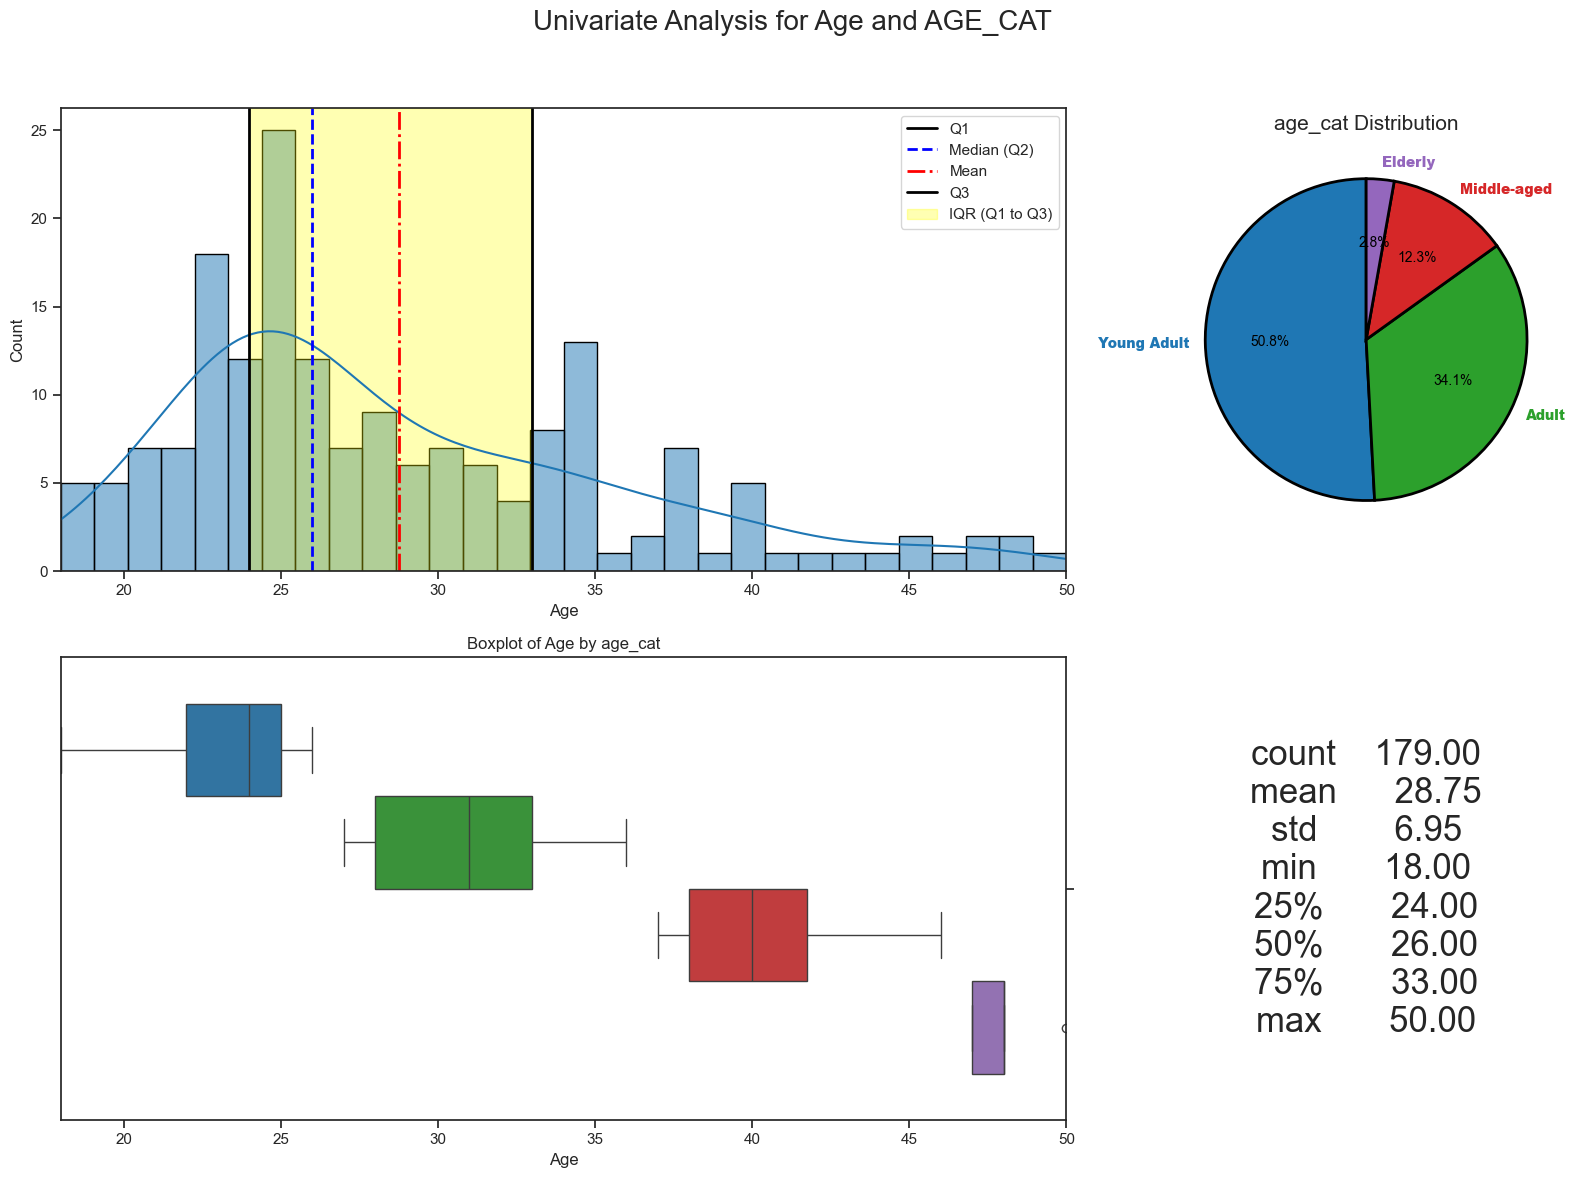

#### Descriptive Statistics for Age:
count    179.00
mean      28.75
std        6.95
min       18.00
25%       24.00
50%       26.00
75%       33.00
max       50.00

- **Skewness**: 1.0
- **Kurtosis**: 0.44

#### Distribution of age_cat:
- **Young Adult**: 91 (50.84%)
- **Adult**: 61 (34.08%)
- **Middle-aged**: 22 (12.29%)
- **Elderly**: 5 (2.79%)


In [ ]:
plot_and_describe(data, 'Age', 'age_cat', hist_bin_size=30)

### Inference:
The Age-data represents a predominantly young population, with a noticeable skew towards younger ages. <br> The distribution of age categories supports this, with the majority of individuals being
classified as Young Adults and Adults. <br> The skewness and kurtosis values indicate that while the distribution is mostly normal, there are some outliers and a slight peak in the data.


## Education

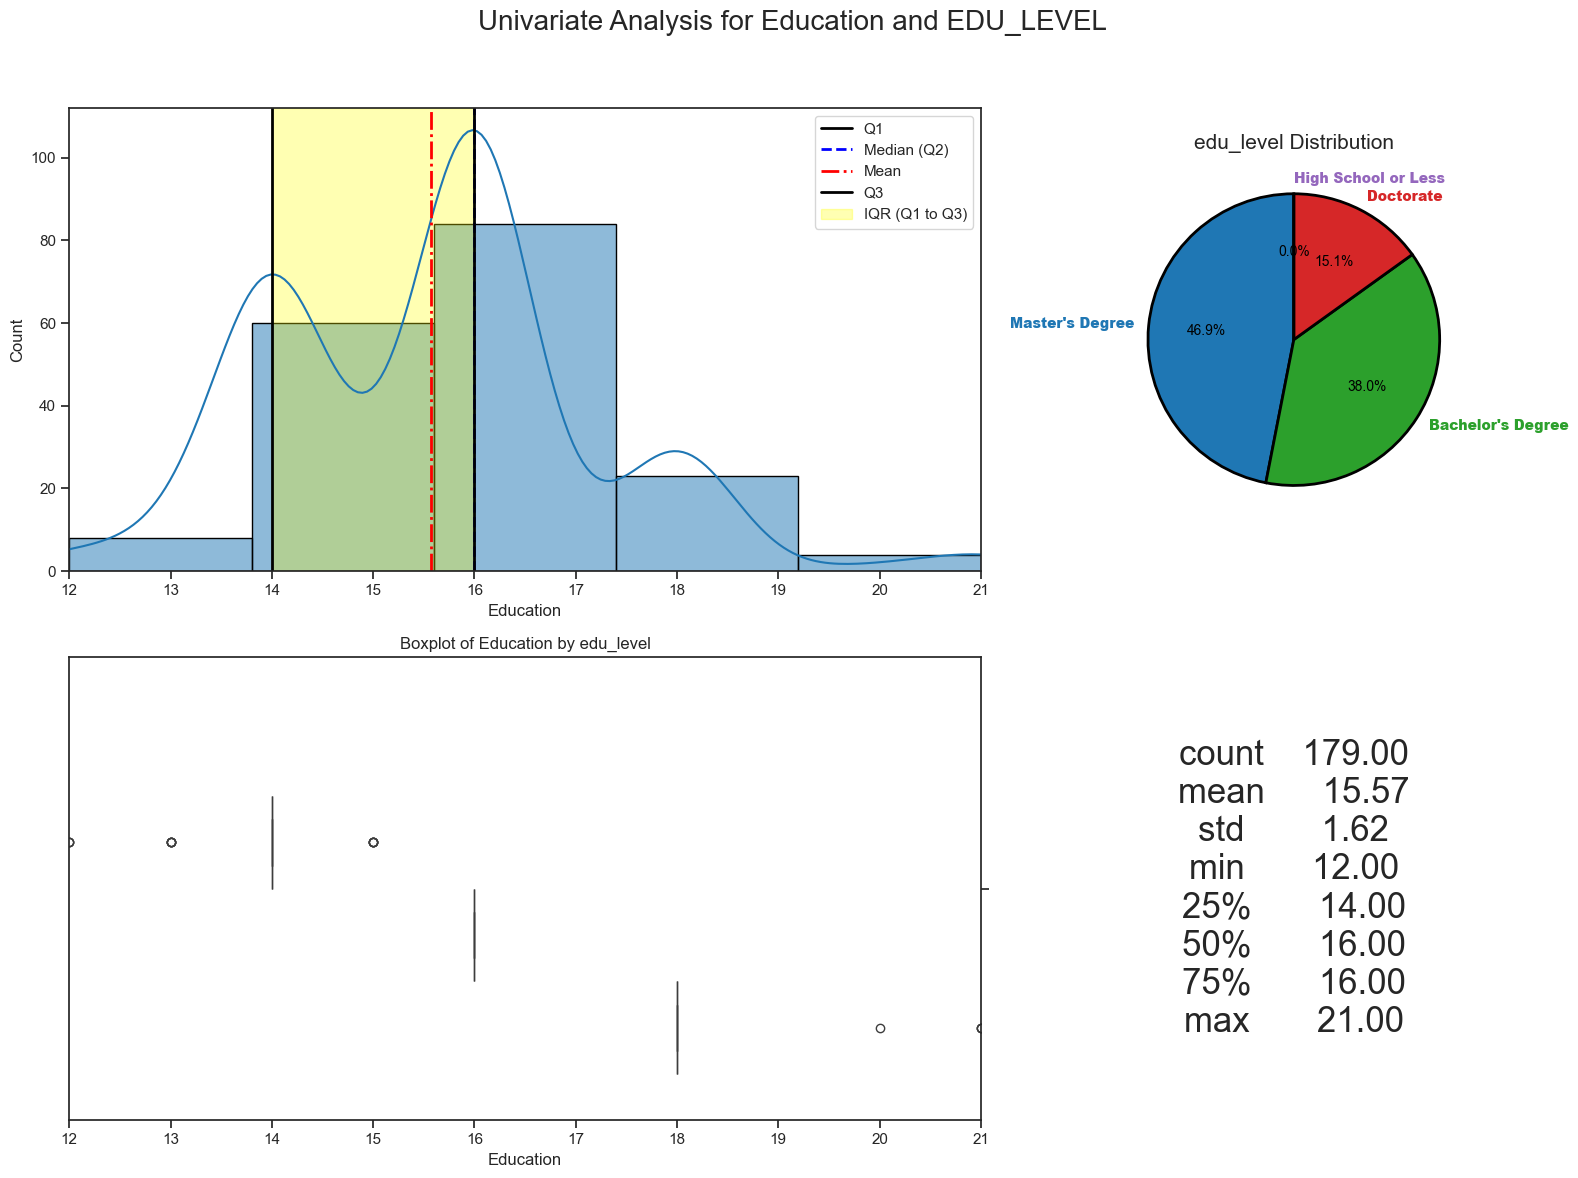

#### Descriptive Statistics for Education:
count    179.00
mean      15.57
std        1.62
min       12.00
25%       14.00
50%       16.00
75%       16.00
max       21.00

- **Skewness**: 0.63
- **Kurtosis**: 1.02

#### Distribution of edu_level:
- **Master's Degree**: 84 (46.93%)
- **Bachelor's Degree**: 68 (37.99%)
- **Doctorate**: 27 (15.08%)
- **High School or Less**: 0 (0.0%)


In [ ]:
plot_and_describe(data, 'Education', 'edu_level', hist_bin_size= 5 )

### Inference:
The Eduacation data represents a well-educated population, with a notable concentration of individuals holding Master's and Bachelor's degrees. <br>The skewness and kurtosis values suggest a distribution slightly skewed to the right with a moderate peak around the mean education level.

## Fitness

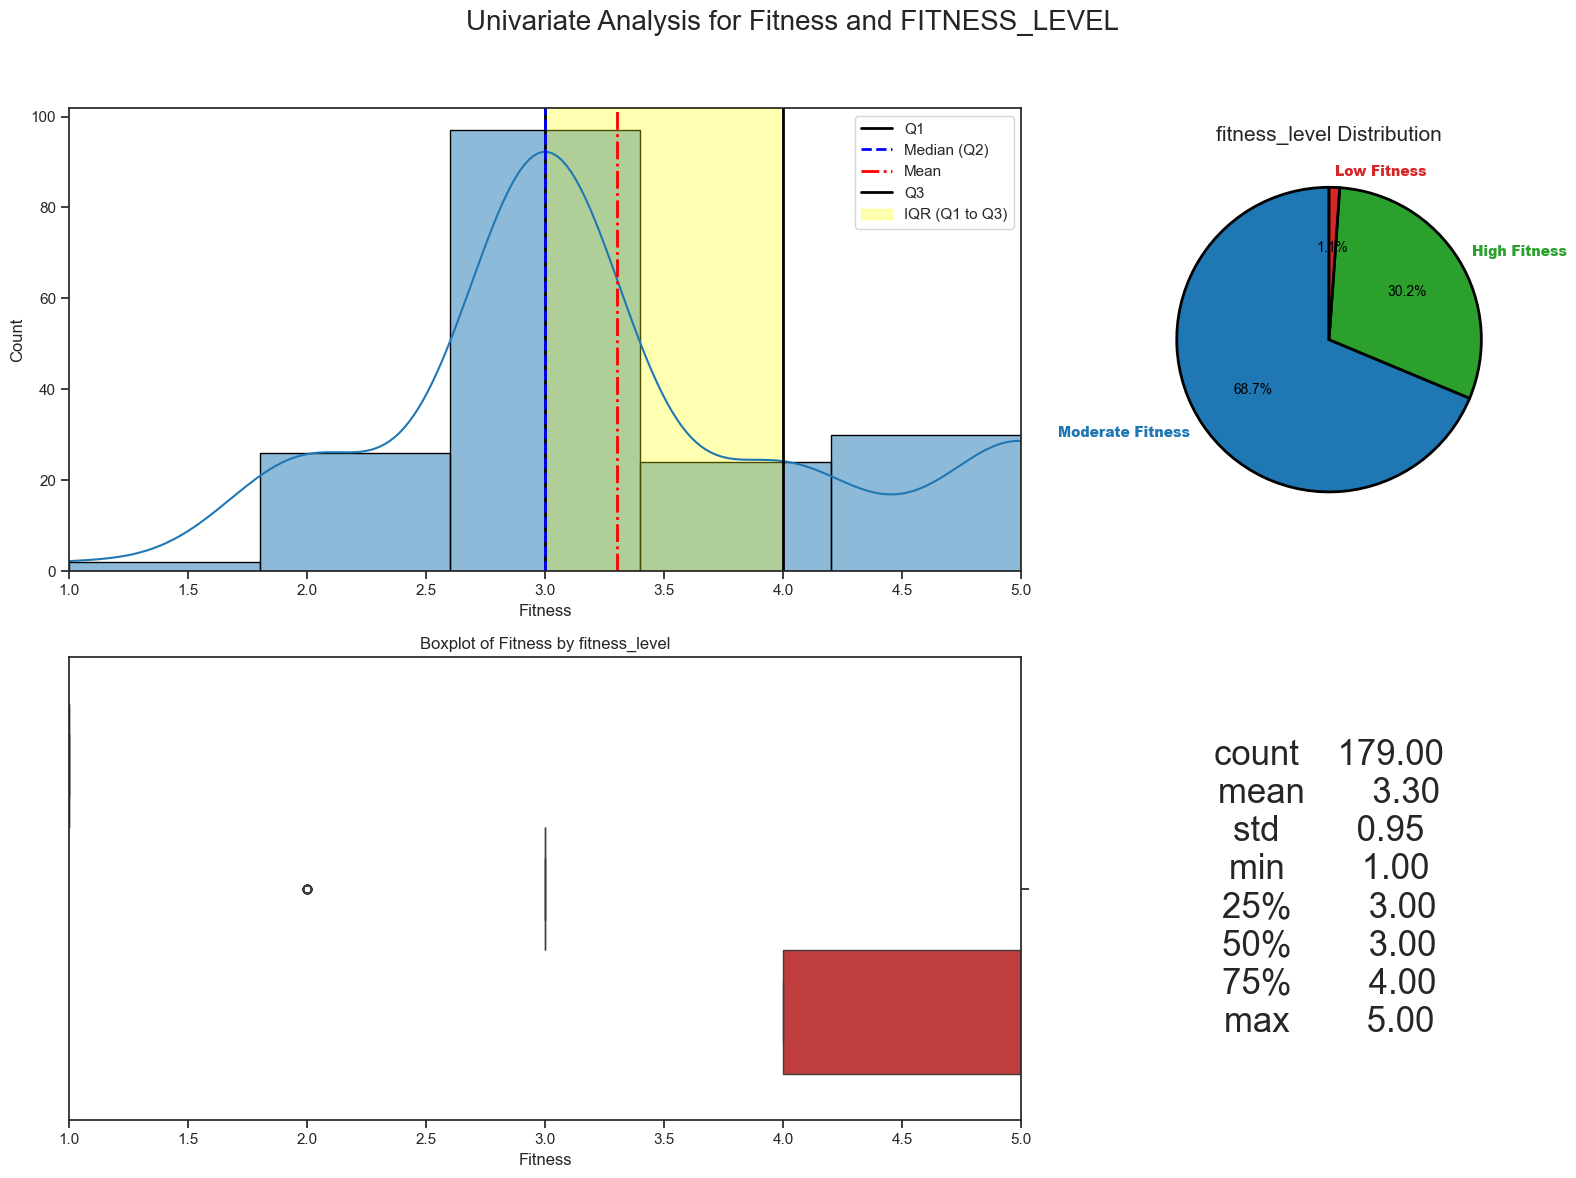

#### Descriptive Statistics for Fitness:
count    179.00
mean       3.30
std        0.95
min        1.00
25%        3.00
50%        3.00
75%        4.00
max        5.00

- **Skewness**: 0.46
- **Kurtosis**: -0.33

#### Distribution of fitness_level:
- **Moderate Fitness**: 123 (68.72%)
- **High Fitness**: 54 (30.17%)
- **Low Fitness**: 2 (1.12%)


In [ ]:
plot_and_describe(data, 'Fitness', 'fitness_level', hist_bin_size=5)

### Inference:
The Fitness data depicts a population with a moderate overall level of fitness, with a slight skew towards higher fitness levels. <br>Most individuals fall into the moderate fitness category, while high fitness levels are also prevalent. <br>Low fitness levels are less common in the sample.

## Income

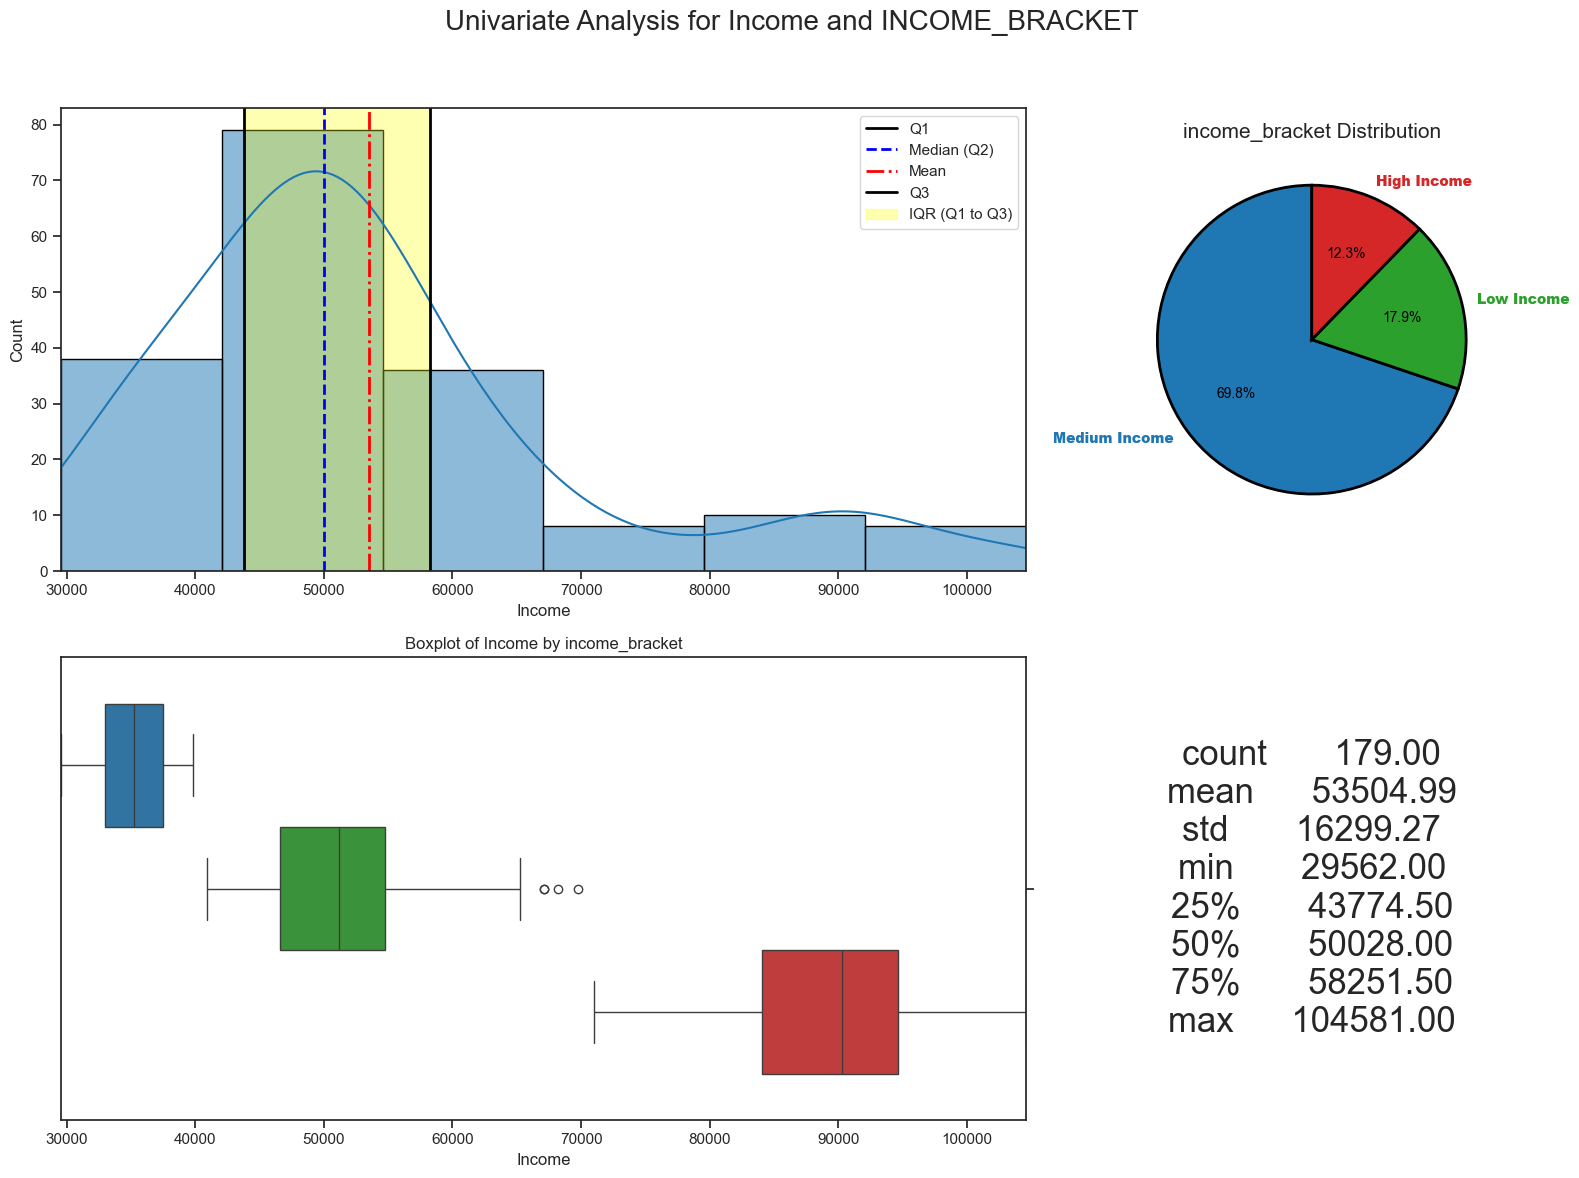

#### Descriptive Statistics for Income:
count       179.00
mean      53504.99
std       16299.27
min       29562.00
25%       43774.50
50%       50028.00
75%       58251.50
max      104581.00

- **Skewness**: 1.31
- **Kurtosis**: 1.52

#### Distribution of income_bracket:
- **Medium Income**: 125 (69.83%)
- **Low Income**: 32 (17.88%)
- **High Income**: 22 (12.29%)


In [ ]:
plot_and_describe(data, 'Income', 'income_bracket', hist_bin_size=6)
# Note : since the boxplots are used for numrical continuis aribal inference here it wont be usefull as no. of years of eduction is of dictinct number of eay, so kindly ignore it

### Inference:
The Income data illustrates a population with a moderate level of income, featuring a right-skewed distribution with some individuals having higher incomes. <br>The majority of individuals belong to the medium income bracket, with significant variability observed within the dataset.

## Miles_Per_Day

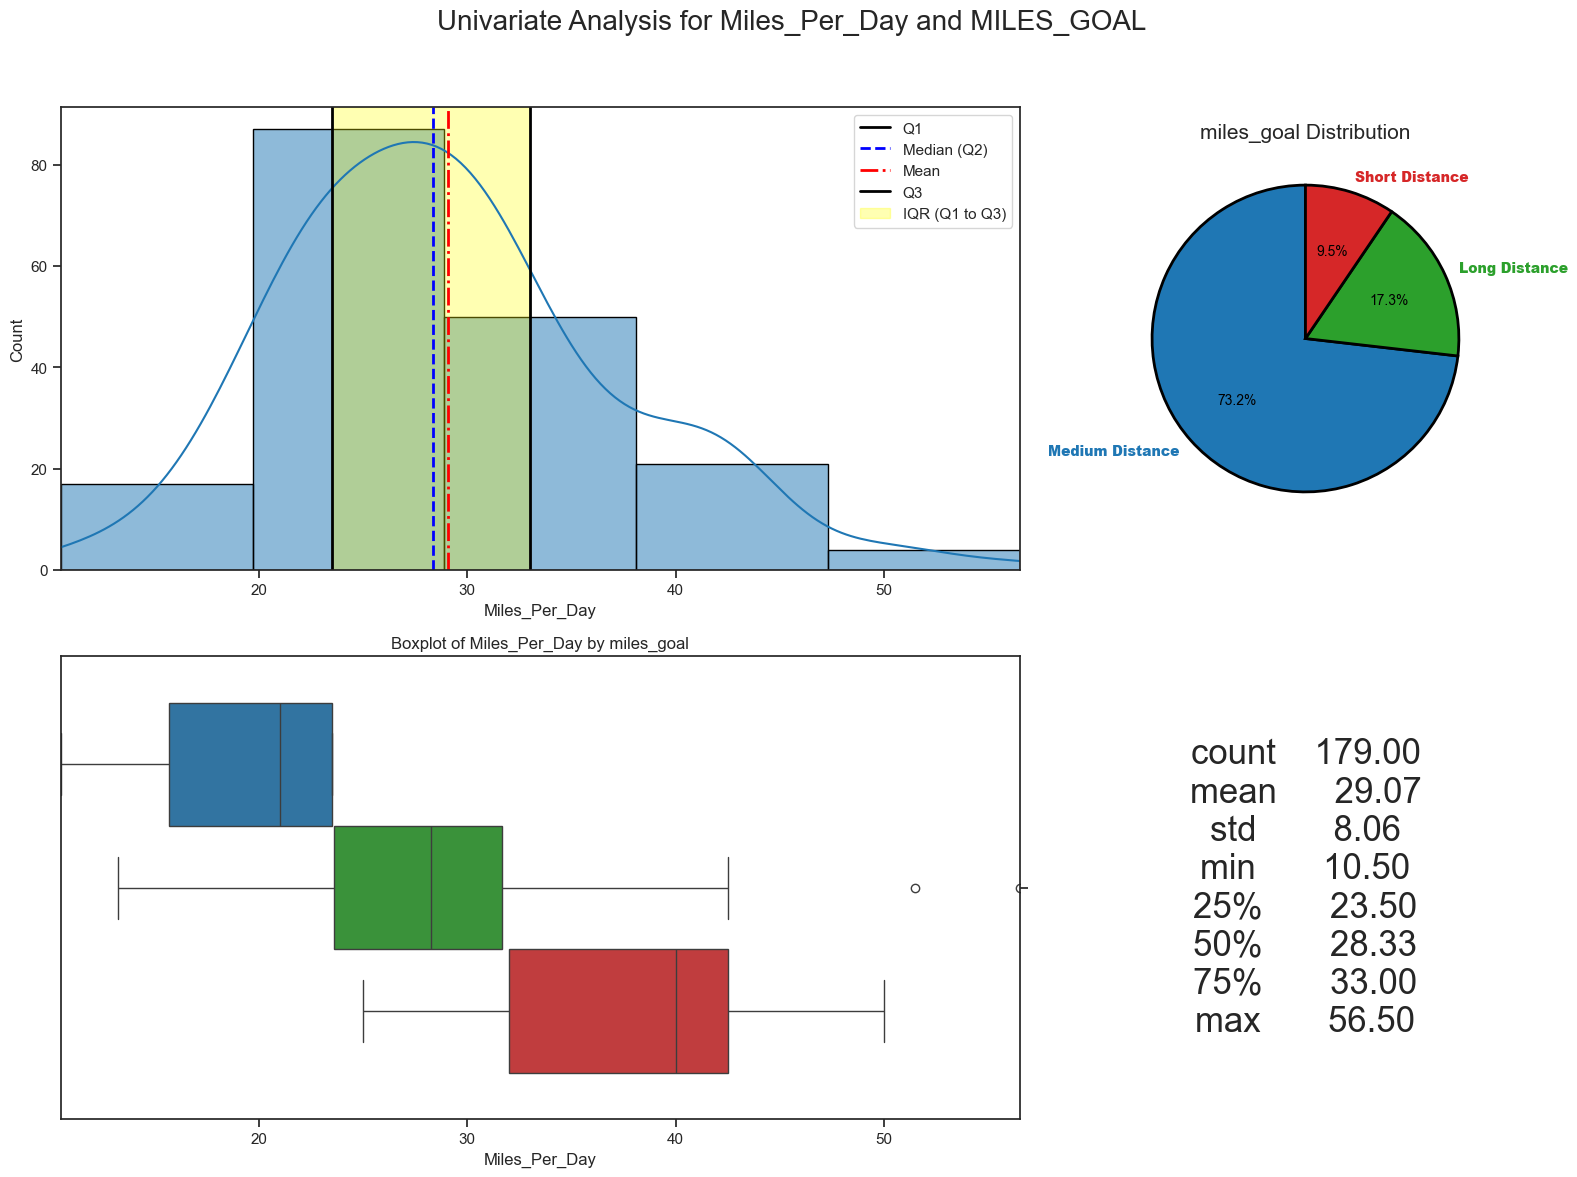

#### Descriptive Statistics for Miles_Per_Day:
count    179.00
mean      29.07
std        8.06
min       10.50
25%       23.50
50%       28.33
75%       33.00
max       56.50

- **Skewness**: 0.59
- **Kurtosis**: 0.43

#### Distribution of miles_goal:
- **Medium Distance**: 131 (73.18%)
- **Long Distance**: 31 (17.32%)
- **Short Distance**: 17 (9.5%)


In [ ]:
plot_and_describe(data, 'Miles_Per_Day', 'miles_goal', hist_bin_size=5)

### Inference:
The Miles_Per_Day data shows that most people cover a moderate distance daily, with a slight tendency towards shorter distances.<br> Most set medium-distance goals, with fewer aiming for long or short distances. There's some variability in daily mileage.

# 📊 Visual Bivariant Analysis

In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Miles_Per_Day', 'age_cat', 'edu_level',
       'fitness_level', 'income_bracket', 'miles_goal'],
      dtype='object')

## Correlation Heatmap

'Correlation Table: '

,Age,Education,Usage,Fitness,Income,Miles,Miles_Per_Day
Age,1.000000,0.279851,0.012580,0.052834,0.510679,0.012666,-0.023381
Education,0.279851,1.000000,0.394766,0.411646,0.632181,0.323057,0.068699
Usage,0.012580,0.394766,1.000000,0.669973,0.521330,0.803050,0.158642
Fitness,0.052834,0.411646,0.669973,1.000000,0.524540,0.800373,0.571252
Income,0.510679,0.632181,0.521330,0.524540,1.000000,0.523589,0.211549
Miles,0.012666,0.323057,0.803050,0.800373,0.523589,1.000000,0.683040
Miles_Per_Day,-0.023381,0.068699,0.158642,0.571252,0.211549,0.683040,1.000000


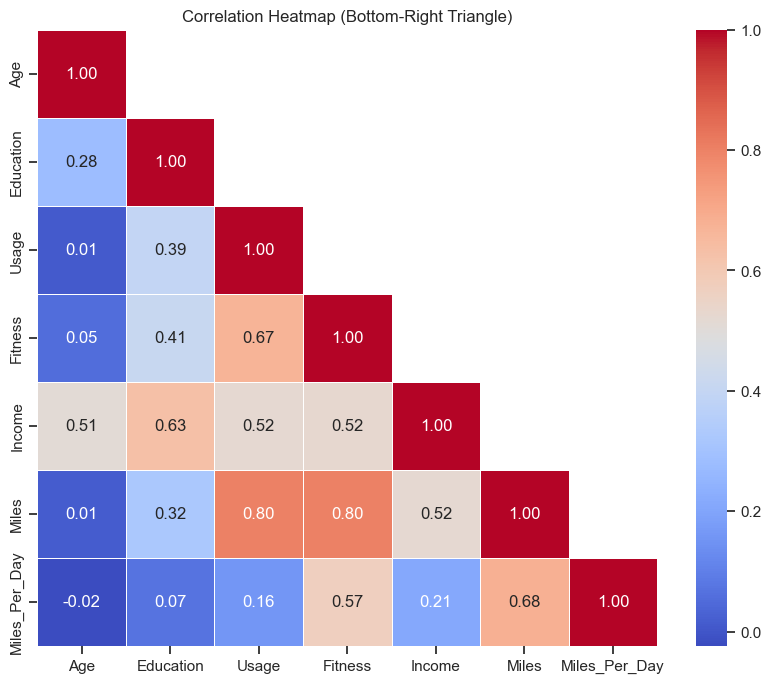

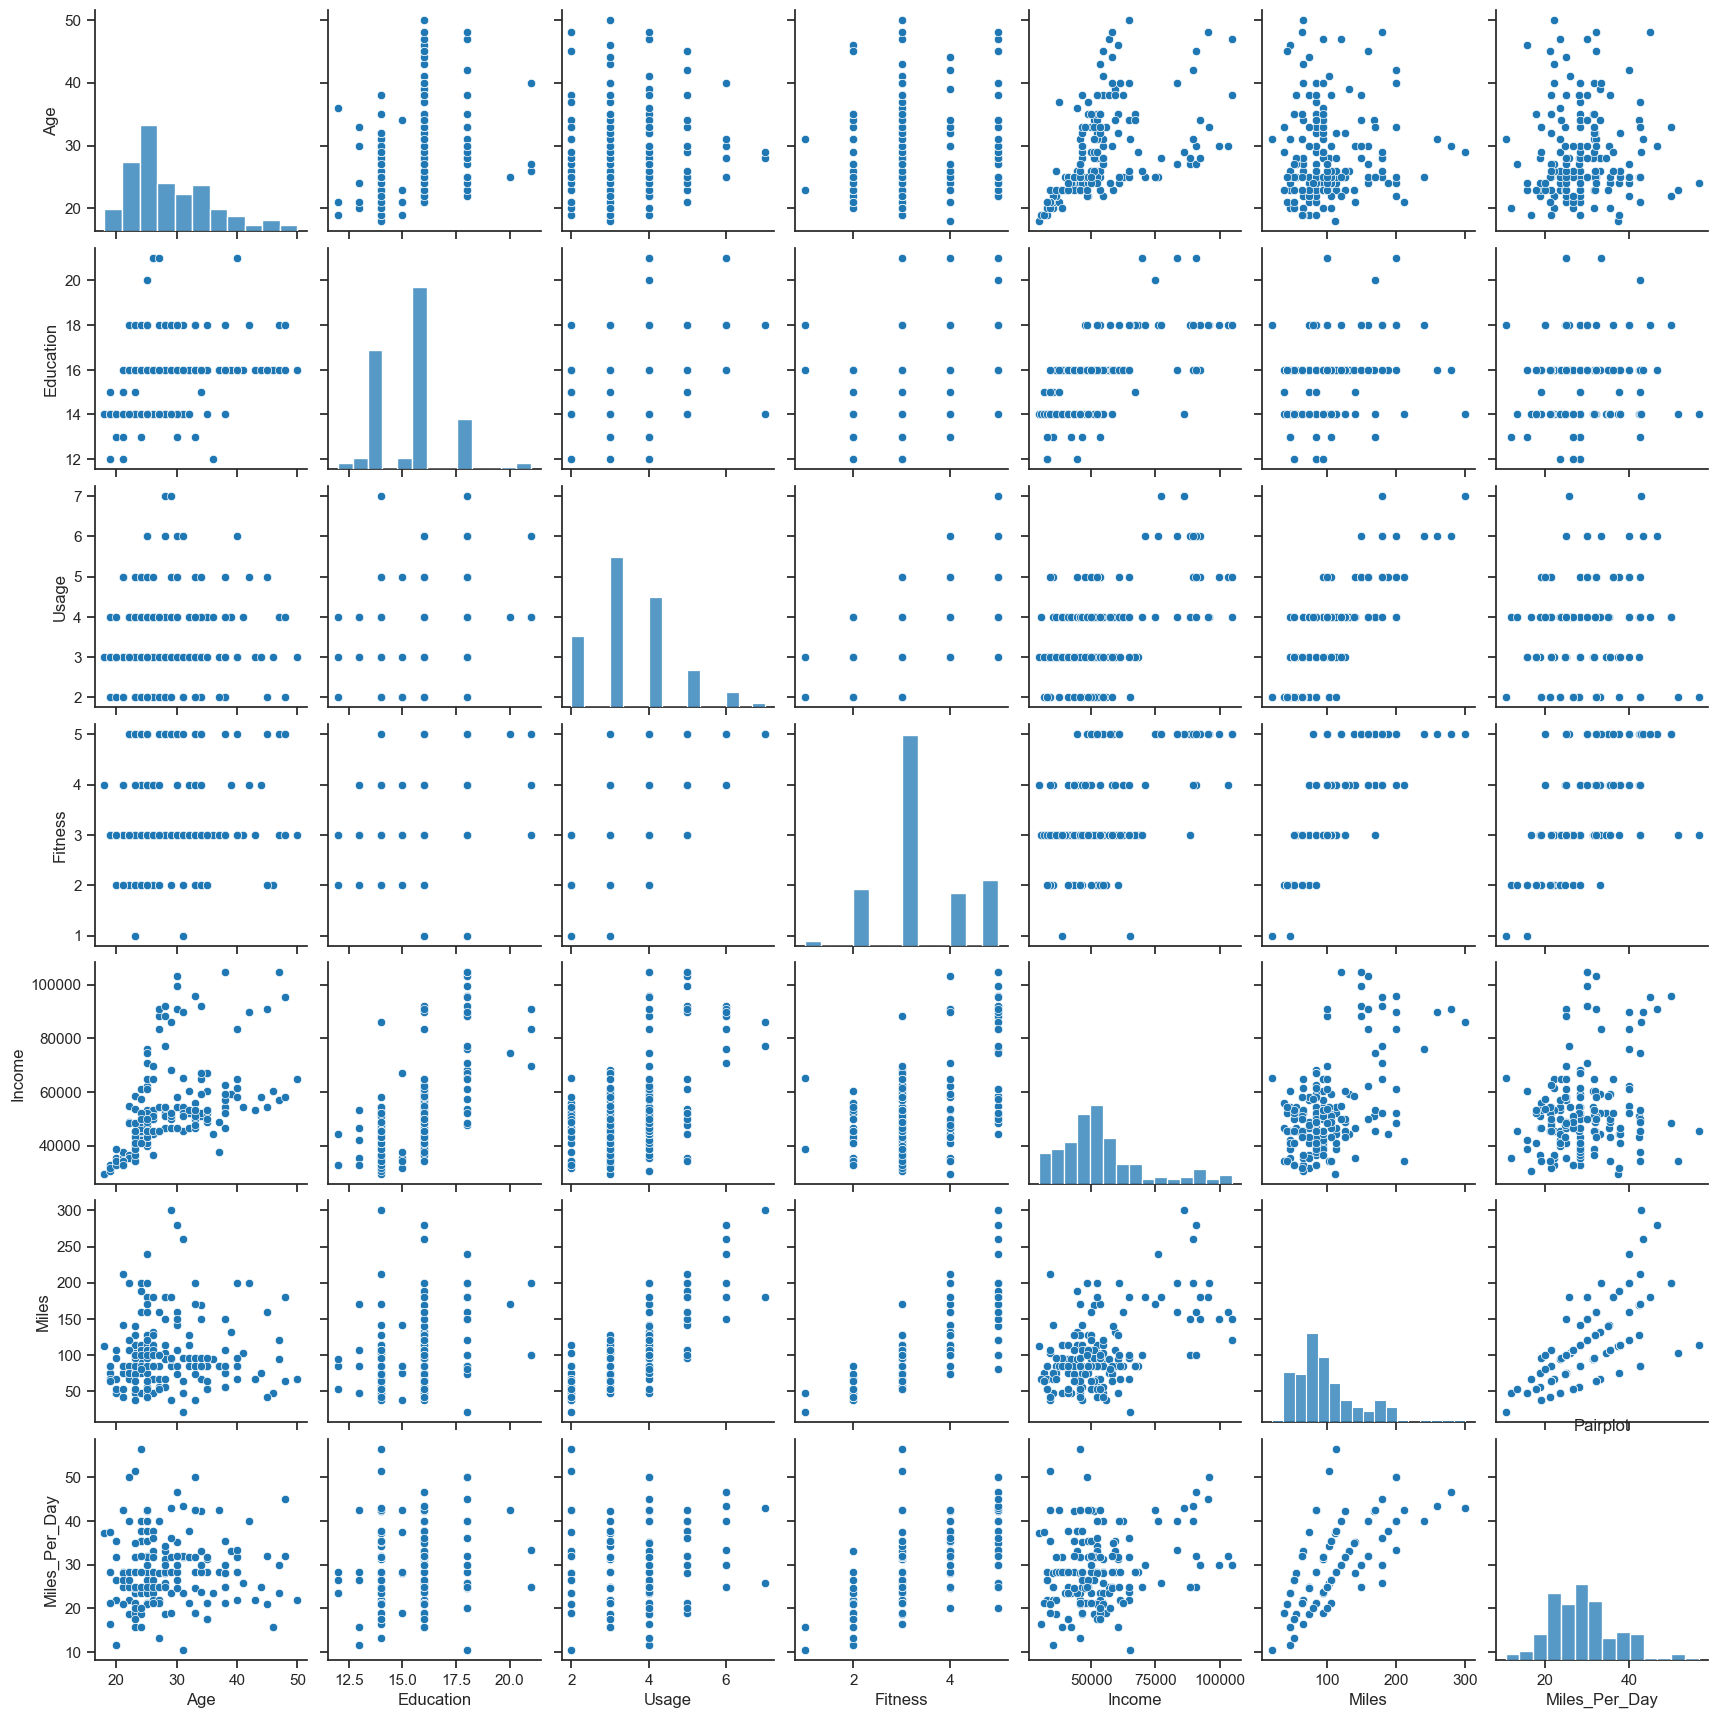

In [ ]:
def analyze_data(df):
    # Correlation heatmap with only bottom-right triangle
    corr = df.corr(numeric_only = True)
    display("Correlation Table: ", corr)
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # Create a mask for the upper triangle
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap (Bottom-Right Triangle)')
    plt.show()

    # Pairplot
    sns.pairplot(df)
    plt.title('Pairplot')
    plt.show()

analyze_data(data)

In [ ]:
def identify_strong_correlations(correlation_matrix, threshold=0.5):
    strong_correlations = {"Positive": [], "Negative": []}
    for i, column in enumerate(correlation_matrix.columns):
        for j in range(i+1, len(correlation_matrix)):
            correlation_coefficient = correlation_matrix.iloc[i, j]
            if correlation_coefficient >= threshold:
                if correlation_coefficient >= 0.7:
                    strong_correlations["Positive"].append((column, correlation_matrix.columns[j], round(correlation_coefficient, 3)))
                elif correlation_coefficient >= 0.5:
                    strong_correlations["Positive"].append((column, correlation_matrix.columns[j], round(correlation_coefficient, 3)))
            elif correlation_coefficient <= -threshold:
                if correlation_coefficient <= -0.7:
                    strong_correlations["Negative"].append((column, correlation_matrix.columns[j], round(correlation_coefficient, 3)))
                elif correlation_coefficient <= -0.5:
                    strong_correlations["Negative"].append((column, correlation_matrix.columns[j], round(correlation_coefficient, 3)))
    return strong_correlations

def display_correlations(strong_correlations):
    output = "## Strong and Very Strong Positive Correlations:\n"
    for pair in strong_correlations["Positive"]:
        output += f"- **{pair[0]}** and **{pair[1]}**: Correlation coefficient = {pair[2]}\n"
    # output += "\n### Strong and Very Strong Negative Correlations:\n"
    # for pair in strong_correlations["Negative"]:
    #     output += f"- **{pair[0]}** and **{pair[1]}**: Correlation coefficient = {pair[2]}\n"
    return output


corr = data.corr(numeric_only=True)
strong_correlations = identify_strong_correlations(corr)
display(Markdown(display_correlations(strong_correlations)))

## Strong and Very Strong Positive Correlations:
- **Age** and **Income**: Correlation coefficient = 0.511
- **Education** and **Income**: Correlation coefficient = 0.632
- **Usage** and **Fitness**: Correlation coefficient = 0.67
- **Usage** and **Income**: Correlation coefficient = 0.521
- **Usage** and **Miles**: Correlation coefficient = 0.803
- **Fitness** and **Income**: Correlation coefficient = 0.525
- **Fitness** and **Miles**: Correlation coefficient = 0.8
- **Fitness** and **Miles_Per_Day**: Correlation coefficient = 0.571
- **Income** and **Miles**: Correlation coefficient = 0.524
- **Miles** and **Miles_Per_Day**: Correlation coefficient = 0.683


In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Miles_Per_Day', 'age_cat', 'edu_level',
       'fitness_level', 'income_bracket', 'miles_goal'],
      dtype='object')

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.948718,82.051282


<Figure size 1000x600 with 0 Axes>

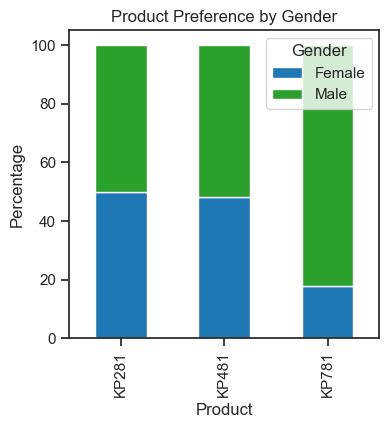

In [ ]:

# Hypothesis 1: Males might prefer different products compared to females.
# Alternative Hypothesis 1: There is no difference in product preference between males and females.

# Calculate the percentage of each product preference by gender
product_gender = data.groupby(['Product', 'Gender']).size().unstack().fillna(0)
product_gender_percentage = product_gender.div(product_gender.sum(axis=1), axis=0) * 100
display(product_gender_percentage)
# Plotting the bar plot
plt.figure(figsize=(10, 6))
product_gender_percentage.plot(kind='bar', stacked=True)
plt.title('Product Preference by Gender')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.show()

**Hypothesis 1:**
- **Null Hypothesis (H0):** No difference in product preference between males and females.
- **Alternative Hypothesis (H1):** Males may prefer different products than females.

**Inferences:**
- KP281 and KP481 show similar preferences between genders.
- KP781 demonstrates a notable gender preference difference.
- This supports the hypothesis partially, especially regarding KP781.

miles_goal,Short Distance,Medium Distance,Long Distance
fitness_level,,,
Low Fitness,2,0,0
Moderate Fitness,15,107,1
High Fitness,0,24,30


<Figure size 1200x800 with 0 Axes>

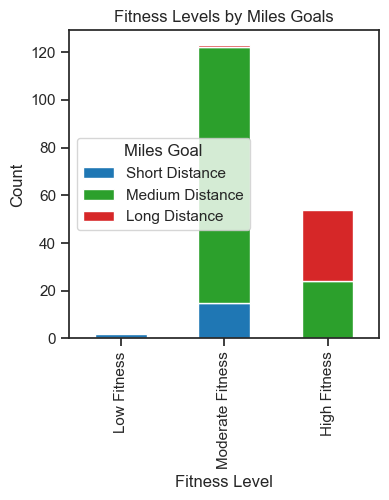

In [ ]:
# # Hypothesis 2: Individuals with higher fitness levels are likely to set longer distance goals.
# # Alternative Hypothesis 2: There is no relationship between fitness levels and miles goals.

# # Calculate the count of each fitness level by miles goal
fitness_miles_goal = data.groupby(['fitness_level', 'miles_goal']).size().unstack().fillna(0)
display(fitness_miles_goal)

# # Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
fitness_miles_goal.plot(kind='bar', stacked=True)
plt.title('Fitness Levels by Miles Goals')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.legend(title='Miles Goal')
plt.show()

**Hypotheses 2:**

**Null Hypothesis (H0):** No relationship exists between fitness levels and miles goals.

**Alternative Hypothesis (H1):** Higher fitness levels correlate with longer distance goals.

**Observed Inference:**
- **Low Fitness:** Only short-distance goals set.
- **Moderate Fitness:** Mostly medium-distance goals, some short, few long.
- **High Fitness:** Primarily long-distance goals, many medium.

**Inference:**
- **Support for H1:** Data suggests a link between fitness and miles goals.
- **Rejection of H0:** Relationship evident, null hypothesis rejected.

This supports the idea that higher fitness levels correlate with longer distance goals, opposing the null hypothesis.

## Violin Plot - Product Preference vs. Age Categories

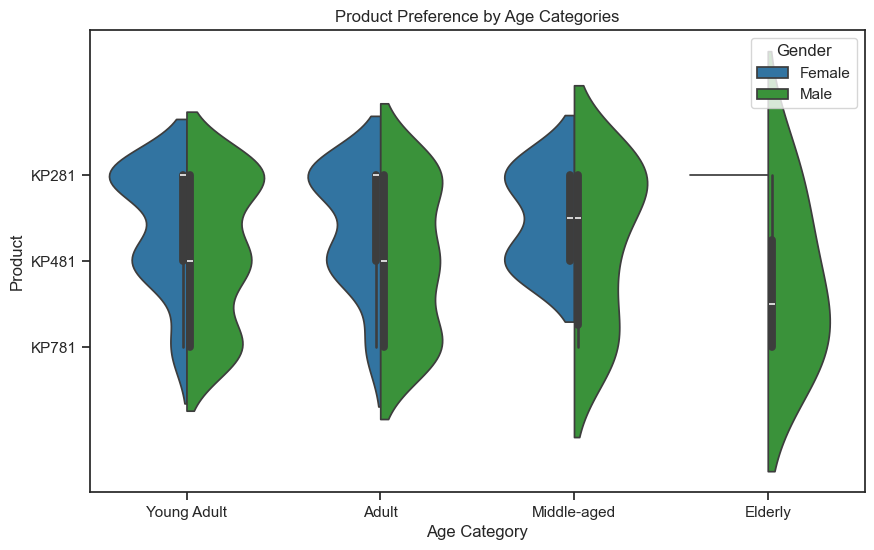

In [ ]:
# Product Preference vs. Age Categories (Violin Plot)

# display(data.groupby(['Product', 'age_cat', 'Gender'])['Product'].count().reset_index(name='Count'))
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='age_cat', y='Product', hue='Gender', split=True)
plt.title('Product Preference by Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Product')
plt.show()

**Inferences**
<br>
1. **KP281 (Product 1):**
   - Young Adults: Slight male preference.
   - Adults: Balanced preference, slightly male-leaning.
   - Middle-aged: Males prefer more.
   - Elderly: Low preference overall.
<br>
2. **KP481 (Product 2):**
   - Young Adults: Slight male preference.
   - Adults: Nearly balanced, slightly male-leaning.
   - Middle-aged: Low preference, slightly male-leaning.
   - Elderly: Very low preference.
<br>
3. **KP781 (Product 3):**
   - Young Adults: Significant male preference.
   - Adults: Noticeably male-preferred.
   - Middle-aged: Males prefer more.
   - Elderly: Low preference overall.<br>

**Overall:**
- Males generally prefer products slightly more.
- Product preference varies across age groups.
- Elderly show lowest preference for all products.

## Scatters Plot - Strong and very Strong Positive Correlations

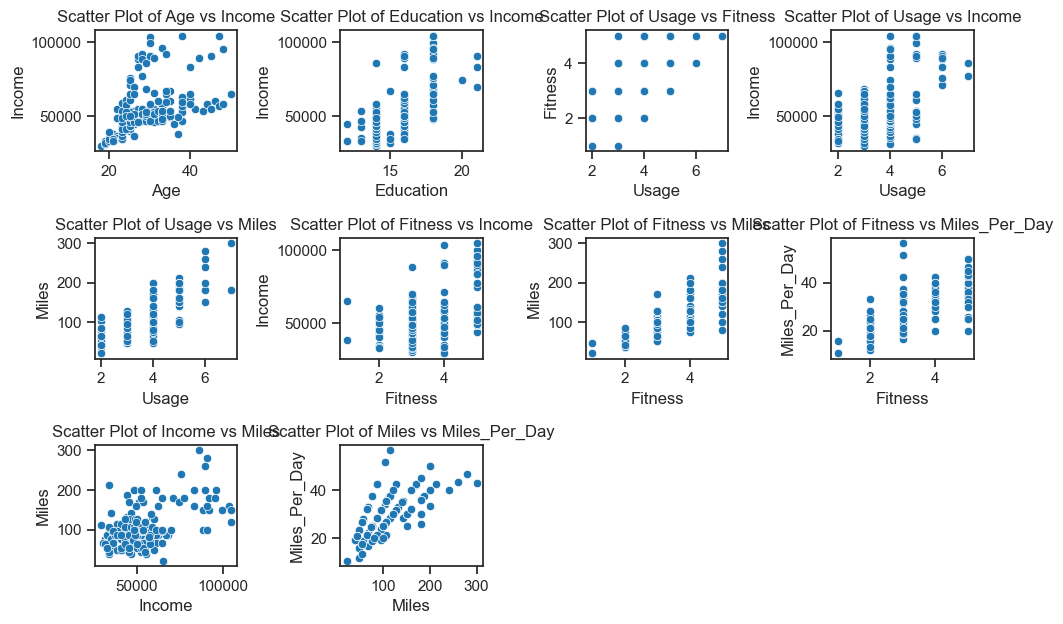

In [ ]:
# Define pairs of variables with strong and very strong positive correlations

correlated_pairs = {
    ('Age', 'Income'): ['Age', 'Income'],
    ('Education', 'Income'): ['Education', 'Income'],
    ('Usage', 'Fitness'): ['Usage', 'Fitness'],
    ('Usage', 'Income'): ['Usage', 'Income'],
    ('Usage', 'Miles'): ['Usage', 'Miles'],
    ('Fitness', 'Income'): ['Fitness', 'Income'],
    ('Fitness', 'Miles'): ['Fitness', 'Miles'],
    ('Fitness', 'Miles_Per_Day'): ['Fitness', 'Miles_Per_Day'],
    ('Income', 'Miles'): ['Income', 'Miles'],
    ('Miles', 'Miles_Per_Day'): ['Miles', 'Miles_Per_Day']
}

plt.figure(figsize=(10, 8))
for i, ((var1, var2), (x, y)) in enumerate(correlated_pairs.items(), start=1):
    plt.subplot(4, 4, i)  # Adjust the subplot layout according to the number of pairs
    sns.scatterplot(x=data[x], y=data[y])  # Use directly from correlated_pairs
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')

plt.tight_layout()
plt.show()

Above Correlated Pair of Features is Visualised.

## Income Vs Age

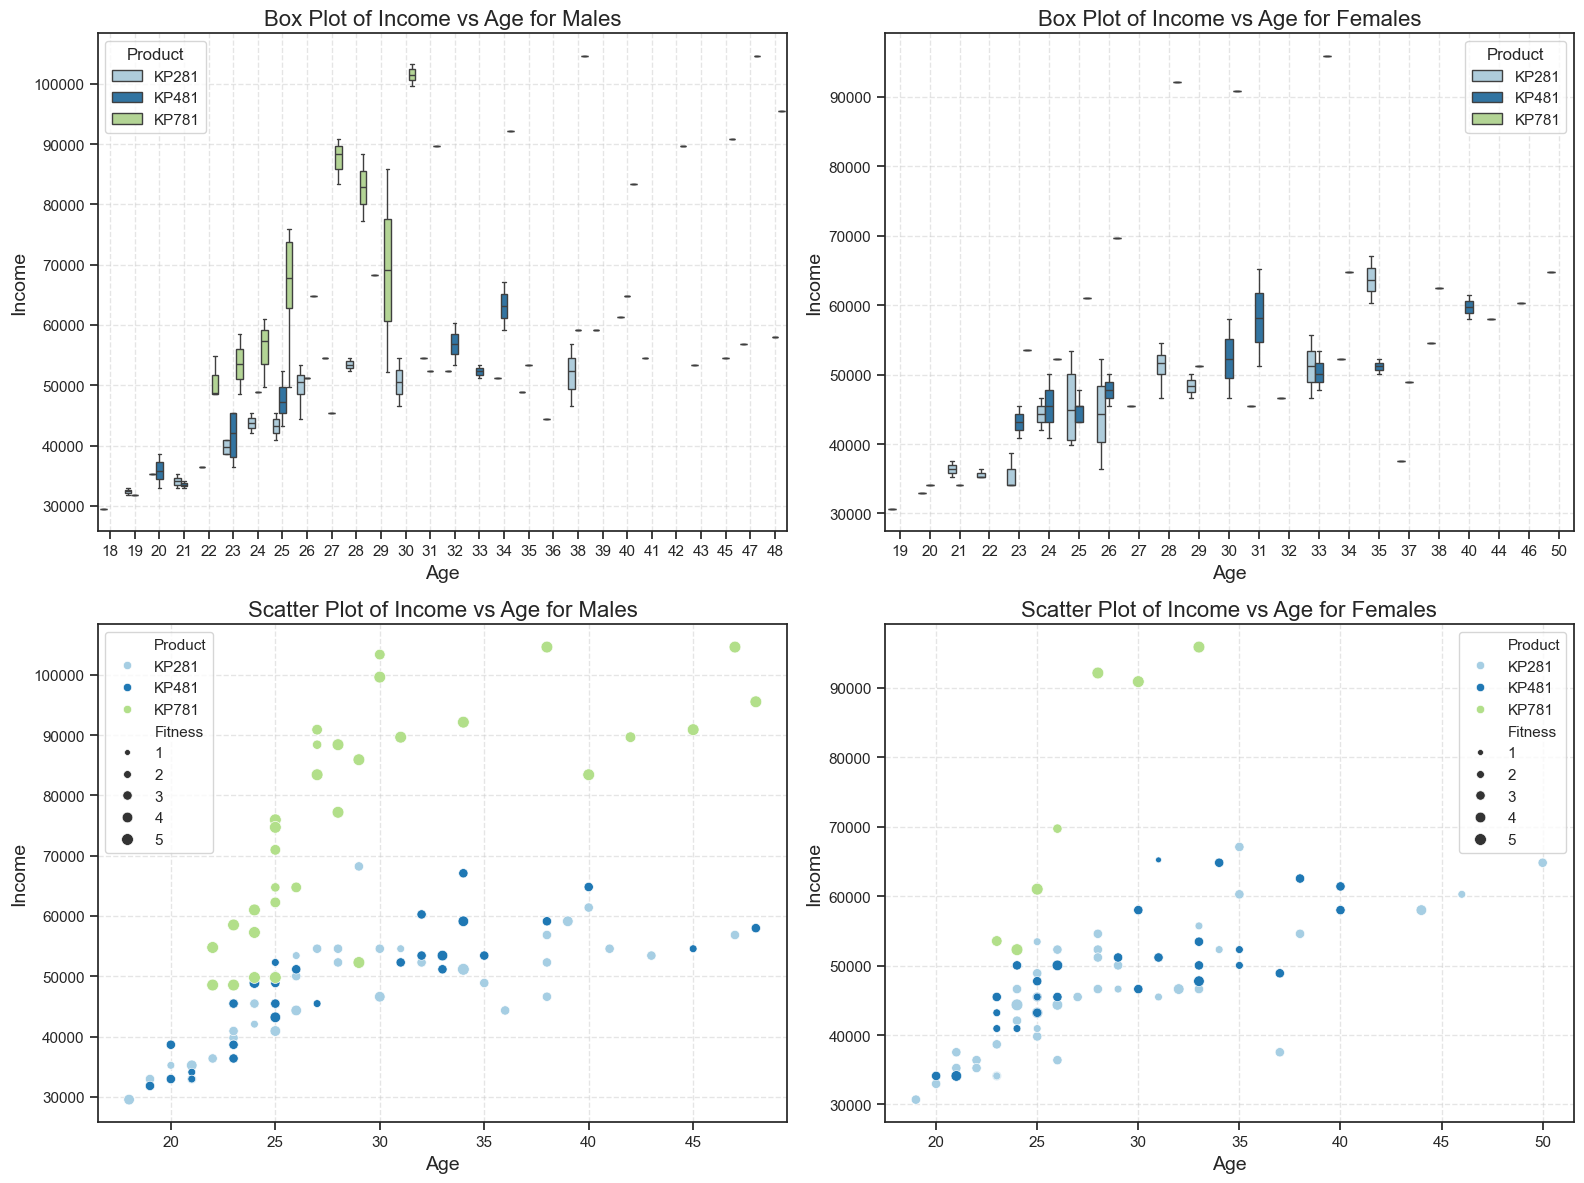

In [ ]:
# Filter data for males and females
data_male = data[data['Gender'] == 'Male']
data_female = data[data['Gender'] == 'Female']

# Define a custom color palette
custom_palette = sns.color_palette("Paired", n_colors=len(data["Product"].unique()))

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Create box plot for males
sns.boxplot(x='Age', y='Income', data=data_male, hue='Product', palette=custom_palette, dodge=True, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Income vs Age for Males', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=14)
axes[0, 0].set_ylabel('Income', fontsize=14)
axes[0, 0].grid(True, linestyle='--', alpha=0.5)
# axes[0, 0].legend(title='Product', fontsize=12, title_fontsize='14', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Create box plot for females
sns.boxplot(x='Age', y='Income', data=data_female, hue='Product', palette=custom_palette, dodge=True, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Income vs Age for Females', fontsize=16)
axes[0, 1].set_xlabel('Age', fontsize=14)
axes[0, 1].set_ylabel('Income', fontsize=14)
axes[0, 1].grid(True, linestyle='--', alpha=0.5)
# axes[0, 1].legend(title='Product', fontsize=12, title_fontsize='14', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Create scatter plot for males
sns.scatterplot(x='Age', y='Income', size='Fitness', hue='Product', palette=custom_palette, data=data_male, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of Income vs Age for Males', fontsize=16)
axes[1, 0].set_xlabel('Age', fontsize=14)
axes[1, 0].set_ylabel('Income', fontsize=14)
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Create scatter plot for females
sns.scatterplot(x='Age', y='Income', size='Fitness', hue='Product', palette=custom_palette, data=data_female, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of Income vs Age for Females', fontsize=16)
axes[1, 1].set_xlabel('Age', fontsize=14)
axes[1, 1].set_ylabel('Income', fontsize=14)
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Simplified summary:

- **Product Distinction**:
   - The chart shows products from the KP-700 series in green.
   - The KP-200 and KP-400 series are shown in shades of blue.
<br>
- **Income and Age Trends**:
   - Customers who buy these products show a trend of increasing income as they get older.
   - Green dots (KP-700 series) are mostly above USD 50,000 income, starting from age 20 and older.
   - Blue dots (KP-200 and KP-400 series) stay below $60,000 income.
<br>
- **Variability in Income**:
   - KP-700 series (green) shows high variability in income.
   - KP-200 and KP-400 series (blue) show less variability in income.
<br>
- **Types of Charts Used**:
   - The observations are based on scatter plots and box plots.
<br>
These points help to understand the relationships between income, age, and the different product series from the charts.

Median Income Table:
Gender Product   Female     Male
0        KP281  46048.5  46617.0
1        KP481  48891.0  50028.0
2        KP781  69721.0  76568.5


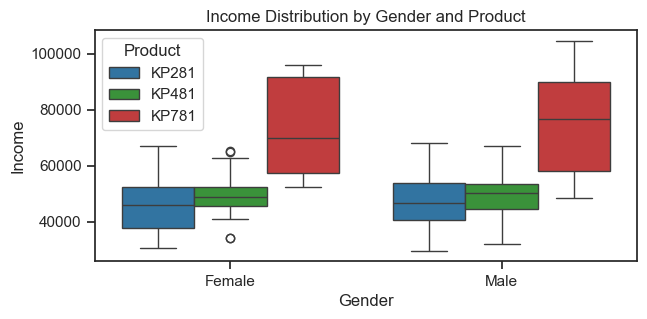


Hypotheses for KP281:
H0: There is no difference in income between males and females.
HA: Males have a higher income than females.

Hypotheses for KP481:
H0: There is no difference in income between males and females.
HA: Males have a higher income than females.

Hypotheses for KP781:
H0: There is no difference in income between males and females.
HA: Males have a higher income than females.

T-Test Results:
KP281 - t-statistic: 0.3901, p-value: 0.3488
KP481 - t-statistic: -0.3133, p-value: 0.6224
KP781 - t-statistic: 0.2125, p-value: 0.4183

Inferences:
KP281: Fail to reject the null hypothesis (H0). There is no statistically significant difference in income between males and females.
KP481: Fail to reject the null hypothesis (H0). There is no statistically significant difference in income between males and females.
KP781: Fail to reject the null hypothesis (H0). There is no statistically significant difference in income between males and females.


In [ ]:
from scipy.stats import ttest_ind

median_income_df = data.groupby(['Gender', 'Product'])['Income'].median().reset_index()
median_income_df = median_income_df.pivot(index='Product', columns='Gender', values='Income').reset_index()

print("Median Income Table:")
print(median_income_df)

# Visualize using boxplot
plt.figure(figsize=(7, 3))
sns.boxplot(x="Gender", y="Income", hue="Product", data=data)
plt.title("Income Distribution by Gender and Product")
plt.show()

# Define the data for t-tests
income_data = {
    'KP281': data[data['Product'] == 'KP281'],
    'KP481': data[data['Product'] == 'KP481'],
    'KP781': data[data['Product'] == 'KP781']
}

# Placeholder for results
test_results = {}

# Perform t-test for each product
for product, df in income_data.items():
    female_income = df[df['Gender'] == 'Female']['Income']
    male_income = df[df['Gender'] == 'Male']['Income']

    # Hypotheses
    print(f"\nHypotheses for {product}:")
    print("H0: There is no difference in income between males and females.")
    print("HA: Males have a higher income than females.")

    # Perform t-test
    t_stat, p_val = ttest_ind(male_income, female_income, equal_var=False, alternative='greater')
    test_results[product] = {'t_stat': t_stat, 'p_val': p_val}

# Display test results
print("\nT-Test Results:")
for product, results in test_results.items():
    print(f"{product} - t-statistic: {results['t_stat']:.4f}, p-value: {results['p_val']:.4f}")

# Inferences based on the t-test results
print("\nInferences:")
for product, results in test_results.items():
    if results['p_val'] < 0.05:
        print(f"{product}: Reject the null hypothesis (H0). There is a statistically significant difference in income between males and females, with males having a higher income.")
    else:
        print(f"{product}: Fail to reject the null hypothesis (H0). There is no statistically significant difference in income between males and females.")



## Correlation Heat Matrix between Demographics Features and Product Types

In [ ]:
# dummy variables for the 'Product' column
data_with_dummies = pd.get_dummies(data, columns=['Product'], prefix='Product')

def display_correlation_matrix(gender):
    gender_data = data_with_dummies[data_with_dummies["Gender"] == gender]
    gender_data = gender_data.replace({"Single": 0, "Partnered": 1}).infer_objects(copy=False)
    correlation_matrix = gender_data.corr(numeric_only=True)
    product_mask = correlation_matrix.index.isin(['Product_KP281', 'Product_KP481', 'Product_KP781'])
    filtered_correlation_matrix = correlation_matrix[product_mask].drop(columns=["Product_KP281", "Product_KP481", "Product_KP781"])

    styled_matrix = filtered_correlation_matrix.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '20px'})

    display(Markdown(f"## Correlation Heat Matrix between {gender} Demographics Features and Product Types"))
    display(styled_matrix)

display_correlation_matrix("Male")
display_correlation_matrix("Female")

## Correlation Heat Matrix between Male Demographics Features and Product Types

,Age,Education,Usage,Fitness,Income,Miles,Miles_Per_Day
Product_KP281,-0.026353,-0.333804,-0.273327,-0.368298,-0.414295,-0.342882,-0.222863
Product_KP481,-0.016376,-0.253144,-0.389926,-0.379644,-0.275182,-0.294310,-0.067814
Product_KP781,0.043985,0.602456,0.674337,0.764166,0.709070,0.652819,0.301925


## Correlation Heat Matrix between Female Demographics Features and Product Types

,Age,Education,Usage,Fitness,Income,Miles,Miles_Per_Day
Product_KP281,-0.019373,-0.216739,-0.296822,-0.192925,-0.321838,-0.327292,-0.191532
Product_KP481,0.067035,-0.102935,-0.036018,-0.156053,-0.031009,-0.047114,0.022351
Product_KP781,-0.079159,0.547153,0.573017,0.595264,0.607796,0.644270,0.293165


### Simplified Correlation Inferences:

**For Males**:
- **Product KP281**: Younger men with lower educational attainment, fitness levels, and income, who use the product infrequently and run fewer miles, tend to prefer this.
- **Product KP481**: Older men with higher educational attainment but similar fitness and income as KP281, and who also use the product infrequently and run fewer miles, prefer this.
- **Product KP781**: Older men with higher educational attainment, good fitness, higher income, who use the product frequently and run more, prefer this.

**For Females**:
- **Product KP281**: Younger women with lower educational attainment, who are in a partnership, and use the product infrequently, usually choose this.
- **Product KP481**: Older women with higher educational attainment, who are single, use the product infrequently but run more, might like this.
- **Product KP781**: Older women with higher educational attainment, who are in a partnership, use the product frequently and run more, prefer this.


<U><B><font size="6" face="Times New Roman">2. Probability Analytics</font></B></U>


The `prob_inference` function is designed for probability inference and analysis on categorical data, specifically for understanding customer behavior based on different demographic or categorical variables.

1. **Cross-Tabulation**:
   - It creates a cross-tabulation (contingency table) of the data, which helps in understanding the relationships between two categorical variables (`col` and `'Product'`) by tabulating the frequency distribution of their combinations.

2. **Probability Calculation**:
   - It calculates and prints:
     - The probability of each category in the specified column contributing to total sales.
     - The probability of a product being bought given the customer's category.
     - The probability of a customer belonging to a category given that they bought a specific product.


In [ ]:
# prob_inference

In [ ]:
from IPython.display import display, Markdown

def prob_inference(col, df):
    display(Markdown(f"\n## Analyzing {col} Column\n"))
    # A cross-tabulation of the data
    cross_df = pd.crosstab(index=df[col], columns=df['Product'], margins=True)

    display(Markdown('~'*150))
    display(cross_df)

    # Calculate and display the probability of each category in the specified column contributing to total sales
    display(Markdown("### 🎲 Marginal Probability of each category contributing to total sales:"))
    for i in range(len(cross_df) - 1):  # Exclude the 'All' row
        category = cross_df.index[i]
        numerator = cross_df.iloc[i]['All']
        denominator = cross_df.loc['All', 'All']
        probability = (numerator / denominator * 100).round(2)
        display(Markdown(f">$P({category}) = \\frac{{ {numerator} }}{{ {denominator} }} = {probability}\\%$"))

    display(Markdown("\n"))

    # Calculate and display the probability of a product being bought given the customer's category
    display(Markdown("### 🎲 Conditional Probability of a product being bought given the customer's category:"))
    for i in range(len(cross_df) - 1):  # Exclude the 'All' row
        category = cross_df.index[i]
        for j in range(len(cross_df.columns) - 1):  # Exclude the 'All' column
            product = cross_df.columns[j]
            numerator = cross_df.iloc[i, j]
            denominator = cross_df.iloc[i]['All']
            probability = (numerator / denominator * 100).round(2)
            display(Markdown(f">$P({product} | {category}) = \\frac{{ P({product} \\cap {category}) }}{{ P({category}) }} = \\frac{{ {numerator} }}{{ {denominator} }} = {probability}\\%$"))
        display(Markdown("\n"))

    # Calculate and display the probability of a customer belonging to a category given that they bought a specific product
    display(Markdown("### 🎲 Conditional Probability of a customer belonging to a category given they bought a specific product:"))
    for j in range(len(cross_df.columns) - 1):  # Exclude the 'All' column
        product = cross_df.columns[j]
        for i in range(len(cross_df) - 1):  # Exclude the 'All' row
            category = cross_df.index[i]
            numerator = cross_df.iloc[i, j]
            denominator = cross_df.iloc[:, j]['All']
            probability = (numerator / denominator * 100).round(2)
            display(Markdown(f">$P({category} | {product}) = \\frac{{ P({category} \\cap {product}) }}{{ P({product}) }} = \\frac{{ {numerator} }}{{ {denominator} }} = {probability}\\%$"))
        display(Markdown("\n"))

# columns = ['age_cat', 'edu_level', 'fitness_level', 'income_bracket', 'miles_goal']
# for col in columns:
#     print(f"\nAnalyzing column: {col}\n")
#     prob_inference(col, data)

In [ ]:
prob_inference("Gender", data)


## Analyzing Gender Column


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,32,103
All,80,60,39,179


### 🎲 Marginal Probability of each category contributing to total sales:

>$P(Female) = \frac{ 76 }{ 179 } = 42.46\%$

>$P(Male) = \frac{ 103 }{ 179 } = 57.54\%$

### 🎲 Conditional Probability of a product being bought given the customer's category:

>$P(KP281 | Female) = \frac{ P(KP281 \cap Female) }{ P(Female) } = \frac{ 40 }{ 76 } = 52.63\%$

>$P(KP481 | Female) = \frac{ P(KP481 \cap Female) }{ P(Female) } = \frac{ 29 }{ 76 } = 38.16\%$

>$P(KP781 | Female) = \frac{ P(KP781 \cap Female) }{ P(Female) } = \frac{ 7 }{ 76 } = 9.21\%$

>$P(KP281 | Male) = \frac{ P(KP281 \cap Male) }{ P(Male) } = \frac{ 40 }{ 103 } = 38.83\%$

>$P(KP481 | Male) = \frac{ P(KP481 \cap Male) }{ P(Male) } = \frac{ 31 }{ 103 } = 30.1\%$

>$P(KP781 | Male) = \frac{ P(KP781 \cap Male) }{ P(Male) } = \frac{ 32 }{ 103 } = 31.07\%$

### 🎲 Conditional Probability of a customer belonging to a category given they bought a specific product:

>$P(Female | KP281) = \frac{ P(Female \cap KP281) }{ P(KP281) } = \frac{ 40 }{ 80 } = 50.0\%$

>$P(Male | KP281) = \frac{ P(Male \cap KP281) }{ P(KP281) } = \frac{ 40 }{ 80 } = 50.0\%$

>$P(Female | KP481) = \frac{ P(Female \cap KP481) }{ P(KP481) } = \frac{ 29 }{ 60 } = 48.33\%$

>$P(Male | KP481) = \frac{ P(Male \cap KP481) }{ P(KP481) } = \frac{ 31 }{ 60 } = 51.67\%$

>$P(Female | KP781) = \frac{ P(Female \cap KP781) }{ P(KP781) } = \frac{ 7 }{ 39 } = 17.95\%$

>$P(Male | KP781) = \frac{ P(Male \cap KP781) }{ P(KP781) } = \frac{ 32 }{ 39 } = 82.05\%$

<font size = 5><B><U>🔍 Inference and Insights</U></B></font>

1. **Major Customer Segments:**
   - *Male*: 57.54%
   - *Female*: 42.46%
<br>
2. **Product Preferences Across Genders:**
   - *Female*: KP281 (52.63%), KP481 (38.16%), KP781 (9.21%)
   - *Male*: KP281 (38.83%), KP481 (30.1%), KP781 (31.07%)
<br>
3. **Customer Category Analysis:**
   - *KP281* has equal purchase likelihood among both genders (50.0% each).
   - *KP481* is almost equally favored, with a slight preference towards males (51.67%).
   - *KP781* is predominantly bought by males (82.05%).
<br>
4. **Targeted Marketing Insights:**
   - Focus KP281 promotions on both genders equally.
   - Slightly target KP481 more towards males.
   - Strongly target KP781 promotions towards males.
<br>
5. **Strategic Recommendations:**
   - Leverage gender balance in KP281 to drive sales from both male and female customers.
   - Develop male-centric campaigns for KP781 to enhance sales in this segment.
   - Consider targeted strategies to boost KP781 interest among female customers.

In [ ]:
prob_inference("age_cat", data)


## Analyzing age_cat Column


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Product,KP281,KP481,KP781,All
age_cat,,,,
Young Adult,41,31,19,91
Adult,26,21,14,61
Middle-aged,11,7,4,22
Elderly,2,1,2,5
All,80,60,39,179


### 🎲 Marginal Probability of each category contributing to total sales:

>$P(Young Adult) = \frac{ 91 }{ 179 } = 50.84\%$

>$P(Adult) = \frac{ 61 }{ 179 } = 34.08\%$

>$P(Middle-aged) = \frac{ 22 }{ 179 } = 12.29\%$

>$P(Elderly) = \frac{ 5 }{ 179 } = 2.79\%$

### 🎲 Conditional Probability of a product being bought given the customer's category:

>$P(KP281 | Young Adult) = \frac{ P(KP281 \cap Young Adult) }{ P(Young Adult) } = \frac{ 41 }{ 91 } = 45.05\%$

>$P(KP481 | Young Adult) = \frac{ P(KP481 \cap Young Adult) }{ P(Young Adult) } = \frac{ 31 }{ 91 } = 34.07\%$

>$P(KP781 | Young Adult) = \frac{ P(KP781 \cap Young Adult) }{ P(Young Adult) } = \frac{ 19 }{ 91 } = 20.88\%$

>$P(KP281 | Adult) = \frac{ P(KP281 \cap Adult) }{ P(Adult) } = \frac{ 26 }{ 61 } = 42.62\%$

>$P(KP481 | Adult) = \frac{ P(KP481 \cap Adult) }{ P(Adult) } = \frac{ 21 }{ 61 } = 34.43\%$

>$P(KP781 | Adult) = \frac{ P(KP781 \cap Adult) }{ P(Adult) } = \frac{ 14 }{ 61 } = 22.95\%$

>$P(KP281 | Middle-aged) = \frac{ P(KP281 \cap Middle-aged) }{ P(Middle-aged) } = \frac{ 11 }{ 22 } = 50.0\%$

>$P(KP481 | Middle-aged) = \frac{ P(KP481 \cap Middle-aged) }{ P(Middle-aged) } = \frac{ 7 }{ 22 } = 31.82\%$

>$P(KP781 | Middle-aged) = \frac{ P(KP781 \cap Middle-aged) }{ P(Middle-aged) } = \frac{ 4 }{ 22 } = 18.18\%$

>$P(KP281 | Elderly) = \frac{ P(KP281 \cap Elderly) }{ P(Elderly) } = \frac{ 2 }{ 5 } = 40.0\%$

>$P(KP481 | Elderly) = \frac{ P(KP481 \cap Elderly) }{ P(Elderly) } = \frac{ 1 }{ 5 } = 20.0\%$

>$P(KP781 | Elderly) = \frac{ P(KP781 \cap Elderly) }{ P(Elderly) } = \frac{ 2 }{ 5 } = 40.0\%$

### 🎲 Conditional Probability of a customer belonging to a category given they bought a specific product:

>$P(Young Adult | KP281) = \frac{ P(Young Adult \cap KP281) }{ P(KP281) } = \frac{ 41 }{ 80 } = 51.25\%$

>$P(Adult | KP281) = \frac{ P(Adult \cap KP281) }{ P(KP281) } = \frac{ 26 }{ 80 } = 32.5\%$

>$P(Middle-aged | KP281) = \frac{ P(Middle-aged \cap KP281) }{ P(KP281) } = \frac{ 11 }{ 80 } = 13.75\%$

>$P(Elderly | KP281) = \frac{ P(Elderly \cap KP281) }{ P(KP281) } = \frac{ 2 }{ 80 } = 2.5\%$

>$P(Young Adult | KP481) = \frac{ P(Young Adult \cap KP481) }{ P(KP481) } = \frac{ 31 }{ 60 } = 51.67\%$

>$P(Adult | KP481) = \frac{ P(Adult \cap KP481) }{ P(KP481) } = \frac{ 21 }{ 60 } = 35.0\%$

>$P(Middle-aged | KP481) = \frac{ P(Middle-aged \cap KP481) }{ P(KP481) } = \frac{ 7 }{ 60 } = 11.67\%$

>$P(Elderly | KP481) = \frac{ P(Elderly \cap KP481) }{ P(KP481) } = \frac{ 1 }{ 60 } = 1.67\%$

>$P(Young Adult | KP781) = \frac{ P(Young Adult \cap KP781) }{ P(KP781) } = \frac{ 19 }{ 39 } = 48.72\%$

>$P(Adult | KP781) = \frac{ P(Adult \cap KP781) }{ P(KP781) } = \frac{ 14 }{ 39 } = 35.9\%$

>$P(Middle-aged | KP781) = \frac{ P(Middle-aged \cap KP781) }{ P(KP781) } = \frac{ 4 }{ 39 } = 10.26\%$

>$P(Elderly | KP781) = \frac{ P(Elderly \cap KP781) }{ P(KP781) } = \frac{ 2 }{ 39 } = 5.13\%$

<font size = 5><B><U>🔍 Inference and Insights</U></B></font>

1. **Major Customer Segments:**
   - *Young adults*: 50.84%
   - *Adults*: 34.08%
   - *Middle-aged*: 12.29%
   - *Elderly*: 2.79%
<br>
2. **Product Preferences Across Age Groups:**
   - *Young adults* prefer KP281 (45.05%) and KP481 (34.07%).
   - *Middle-aged* prefer KP281 (50.0%).
<br>
3. **Customer Category Analysis:**
   - *Young adults* dominate KP281 (51.25%) and KP481 (51.67%) purchases.
<br>
4. **Targeted Marketing Insights:**
   - Focus on *young adults* for KP281 and KP481.
   - Increase KP781 appeal among *middle-aged* and *elderly*.
<br>
5. **Strategic Recommendations:**
   - Leverage *young adults*’ buying behavior to boost sales.
   - Develop strategies to enhance KP781 adoption among *middle-aged* and *elderly*.

In [ ]:
prob_inference("edu_level", data)


## Analyzing edu_level Column


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Product,KP281,KP481,KP781,All
edu_level,,,,
Bachelor's Degree,39,27,2,68
Master's Degree,39,31,14,84
Doctorate,2,2,23,27
All,80,60,39,179


### 🎲 Marginal Probability of each category contributing to total sales:

>$P(Bachelor's Degree) = \frac{ 68 }{ 179 } = 37.99\%$

>$P(Master's Degree) = \frac{ 84 }{ 179 } = 46.93\%$

>$P(Doctorate) = \frac{ 27 }{ 179 } = 15.08\%$

### 🎲 Conditional Probability of a product being bought given the customer's category:

>$P(KP281 | Bachelor's Degree) = \frac{ P(KP281 \cap Bachelor's Degree) }{ P(Bachelor's Degree) } = \frac{ 39 }{ 68 } = 57.35\%$

>$P(KP481 | Bachelor's Degree) = \frac{ P(KP481 \cap Bachelor's Degree) }{ P(Bachelor's Degree) } = \frac{ 27 }{ 68 } = 39.71\%$

>$P(KP781 | Bachelor's Degree) = \frac{ P(KP781 \cap Bachelor's Degree) }{ P(Bachelor's Degree) } = \frac{ 2 }{ 68 } = 2.94\%$

>$P(KP281 | Master's Degree) = \frac{ P(KP281 \cap Master's Degree) }{ P(Master's Degree) } = \frac{ 39 }{ 84 } = 46.43\%$

>$P(KP481 | Master's Degree) = \frac{ P(KP481 \cap Master's Degree) }{ P(Master's Degree) } = \frac{ 31 }{ 84 } = 36.9\%$

>$P(KP781 | Master's Degree) = \frac{ P(KP781 \cap Master's Degree) }{ P(Master's Degree) } = \frac{ 14 }{ 84 } = 16.67\%$

>$P(KP281 | Doctorate) = \frac{ P(KP281 \cap Doctorate) }{ P(Doctorate) } = \frac{ 2 }{ 27 } = 7.41\%$

>$P(KP481 | Doctorate) = \frac{ P(KP481 \cap Doctorate) }{ P(Doctorate) } = \frac{ 2 }{ 27 } = 7.41\%$

>$P(KP781 | Doctorate) = \frac{ P(KP781 \cap Doctorate) }{ P(Doctorate) } = \frac{ 23 }{ 27 } = 85.19\%$

### 🎲 Conditional Probability of a customer belonging to a category given they bought a specific product:

>$P(Bachelor's Degree | KP281) = \frac{ P(Bachelor's Degree \cap KP281) }{ P(KP281) } = \frac{ 39 }{ 80 } = 48.75\%$

>$P(Master's Degree | KP281) = \frac{ P(Master's Degree \cap KP281) }{ P(KP281) } = \frac{ 39 }{ 80 } = 48.75\%$

>$P(Doctorate | KP281) = \frac{ P(Doctorate \cap KP281) }{ P(KP281) } = \frac{ 2 }{ 80 } = 2.5\%$

>$P(Bachelor's Degree | KP481) = \frac{ P(Bachelor's Degree \cap KP481) }{ P(KP481) } = \frac{ 27 }{ 60 } = 45.0\%$

>$P(Master's Degree | KP481) = \frac{ P(Master's Degree \cap KP481) }{ P(KP481) } = \frac{ 31 }{ 60 } = 51.67\%$

>$P(Doctorate | KP481) = \frac{ P(Doctorate \cap KP481) }{ P(KP481) } = \frac{ 2 }{ 60 } = 3.33\%$

>$P(Bachelor's Degree | KP781) = \frac{ P(Bachelor's Degree \cap KP781) }{ P(KP781) } = \frac{ 2 }{ 39 } = 5.13\%$

>$P(Master's Degree | KP781) = \frac{ P(Master's Degree \cap KP781) }{ P(KP781) } = \frac{ 14 }{ 39 } = 35.9\%$

>$P(Doctorate | KP781) = \frac{ P(Doctorate \cap KP781) }{ P(KP781) } = \frac{ 23 }{ 39 } = 58.97\%$

<font size = 5><B><U>🔍 Inference and Insights</U></B></font>

1. **Major Customer Segments:**
   - *Master's Degree*: 46.93%
   - *Bachelor's Degree*: 37.99%
   - *Doctorate*: 15.08%
<br>
2. **Product Preferences Across Education Levels:**
   - *Bachelor's*: KP281 (57.35%) and KP481 (39.71%)
   - *Master's*: KP281 (46.43%) and KP481 (36.9%)
   - *Doctorate*: KP781 (85.19%)
<br>
3. **Customer Category Analysis:**
   - *Bachelor's and Master's* equally dominate KP281 purchases (48.75% each).
   - *Master's* dominate KP481 purchases (51.67%).
<br>
4. **Targeted Marketing Insights:**
   - Focus on *Master's Degree* holders for KP281 and KP481.
   - Increase KP781 appeal among *Bachelor's* and *Master's* holders.
<br>
5. **Strategic Recommendations:**
   - Leverage *Master's Degree* holders' purchasing behavior to boost sales.
   - Develop strategies to enhance KP781 adoption among *Bachelor's* and *Master's* holders.

In [ ]:
prob_inference("fitness_level", data)


## Analyzing fitness_level Column


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Product,KP281,KP481,KP781,All
fitness_level,,,,
Low Fitness,1,1,0,2
Moderate Fitness,68,51,4,123
High Fitness,11,8,35,54
All,80,60,39,179


### 🎲 Marginal Probability of each category contributing to total sales:

>$P(Low Fitness) = \frac{ 2 }{ 179 } = 1.12\%$

>$P(Moderate Fitness) = \frac{ 123 }{ 179 } = 68.72\%$

>$P(High Fitness) = \frac{ 54 }{ 179 } = 30.17\%$

### 🎲 Conditional Probability of a product being bought given the customer's category:

>$P(KP281 | Low Fitness) = \frac{ P(KP281 \cap Low Fitness) }{ P(Low Fitness) } = \frac{ 1 }{ 2 } = 50.0\%$

>$P(KP481 | Low Fitness) = \frac{ P(KP481 \cap Low Fitness) }{ P(Low Fitness) } = \frac{ 1 }{ 2 } = 50.0\%$

>$P(KP781 | Low Fitness) = \frac{ P(KP781 \cap Low Fitness) }{ P(Low Fitness) } = \frac{ 0 }{ 2 } = 0.0\%$

>$P(KP281 | Moderate Fitness) = \frac{ P(KP281 \cap Moderate Fitness) }{ P(Moderate Fitness) } = \frac{ 68 }{ 123 } = 55.28\%$

>$P(KP481 | Moderate Fitness) = \frac{ P(KP481 \cap Moderate Fitness) }{ P(Moderate Fitness) } = \frac{ 51 }{ 123 } = 41.46\%$

>$P(KP781 | Moderate Fitness) = \frac{ P(KP781 \cap Moderate Fitness) }{ P(Moderate Fitness) } = \frac{ 4 }{ 123 } = 3.25\%$

>$P(KP281 | High Fitness) = \frac{ P(KP281 \cap High Fitness) }{ P(High Fitness) } = \frac{ 11 }{ 54 } = 20.37\%$

>$P(KP481 | High Fitness) = \frac{ P(KP481 \cap High Fitness) }{ P(High Fitness) } = \frac{ 8 }{ 54 } = 14.81\%$

>$P(KP781 | High Fitness) = \frac{ P(KP781 \cap High Fitness) }{ P(High Fitness) } = \frac{ 35 }{ 54 } = 64.81\%$

### 🎲 Conditional Probability of a customer belonging to a category given they bought a specific product:

>$P(Low Fitness | KP281) = \frac{ P(Low Fitness \cap KP281) }{ P(KP281) } = \frac{ 1 }{ 80 } = 1.25\%$

>$P(Moderate Fitness | KP281) = \frac{ P(Moderate Fitness \cap KP281) }{ P(KP281) } = \frac{ 68 }{ 80 } = 85.0\%$

>$P(High Fitness | KP281) = \frac{ P(High Fitness \cap KP281) }{ P(KP281) } = \frac{ 11 }{ 80 } = 13.75\%$

>$P(Low Fitness | KP481) = \frac{ P(Low Fitness \cap KP481) }{ P(KP481) } = \frac{ 1 }{ 60 } = 1.67\%$

>$P(Moderate Fitness | KP481) = \frac{ P(Moderate Fitness \cap KP481) }{ P(KP481) } = \frac{ 51 }{ 60 } = 85.0\%$

>$P(High Fitness | KP481) = \frac{ P(High Fitness \cap KP481) }{ P(KP481) } = \frac{ 8 }{ 60 } = 13.33\%$

>$P(Low Fitness | KP781) = \frac{ P(Low Fitness \cap KP781) }{ P(KP781) } = \frac{ 0 }{ 39 } = 0.0\%$

>$P(Moderate Fitness | KP781) = \frac{ P(Moderate Fitness \cap KP781) }{ P(KP781) } = \frac{ 4 }{ 39 } = 10.26\%$

>$P(High Fitness | KP781) = \frac{ P(High Fitness \cap KP781) }{ P(KP781) } = \frac{ 35 }{ 39 } = 89.74\%$

<font size = 5><B><U>🔍 Inference and Insights</U></B></font>

1. **Major Customer Segments:**
   - *Moderate Fitness*: 68.72%
   - *High Fitness*: 30.17%
   - *Low Fitness*: 1.12%
<br>
2. **Product Preferences Across Fitness Levels:**
   - *Moderate Fitness*: KP281 (55.28%) and KP481 (41.46%)
   - *High Fitness*: KP781 (64.81%)
<br>
3. **Customer Category Analysis:**
   - *Moderate Fitness* dominates purchases of KP281 (85.0%) and KP481 (85.0%)
   - *High Fitness* dominates KP781 purchases (89.74%)
<br>
4. **Targeted Marketing Insights:**
   - Focus on *Moderate Fitness* customers for KP281 and KP481.
   - Emphasize KP781 in marketing to *High Fitness* customers.
<br>
5. **Strategic Recommendations:**
   - Leverage *Moderate Fitness* customers' purchasing behavior to boost sales of KP281 and KP481.
   - Enhance strategies to increase KP781 sales among *High Fitness* customers.
<br>

In [ ]:
prob_inference("income_bracket", data)


## Analyzing income_bracket Column


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Product,KP281,KP481,KP781,All
income_bracket,,,,
Low Income,23,9,0,32
Medium Income,57,51,17,125
High Income,0,0,22,22
All,80,60,39,179


### 🎲 Marginal Probability of each category contributing to total sales:

>$P(Low Income) = \frac{ 32 }{ 179 } = 17.88\%$

>$P(Medium Income) = \frac{ 125 }{ 179 } = 69.83\%$

>$P(High Income) = \frac{ 22 }{ 179 } = 12.29\%$

### 🎲 Conditional Probability of a product being bought given the customer's category:

>$P(KP281 | Low Income) = \frac{ P(KP281 \cap Low Income) }{ P(Low Income) } = \frac{ 23 }{ 32 } = 71.88\%$

>$P(KP481 | Low Income) = \frac{ P(KP481 \cap Low Income) }{ P(Low Income) } = \frac{ 9 }{ 32 } = 28.12\%$

>$P(KP781 | Low Income) = \frac{ P(KP781 \cap Low Income) }{ P(Low Income) } = \frac{ 0 }{ 32 } = 0.0\%$

>$P(KP281 | Medium Income) = \frac{ P(KP281 \cap Medium Income) }{ P(Medium Income) } = \frac{ 57 }{ 125 } = 45.6\%$

>$P(KP481 | Medium Income) = \frac{ P(KP481 \cap Medium Income) }{ P(Medium Income) } = \frac{ 51 }{ 125 } = 40.8\%$

>$P(KP781 | Medium Income) = \frac{ P(KP781 \cap Medium Income) }{ P(Medium Income) } = \frac{ 17 }{ 125 } = 13.6\%$

>$P(KP281 | High Income) = \frac{ P(KP281 \cap High Income) }{ P(High Income) } = \frac{ 0 }{ 22 } = 0.0\%$

>$P(KP481 | High Income) = \frac{ P(KP481 \cap High Income) }{ P(High Income) } = \frac{ 0 }{ 22 } = 0.0\%$

>$P(KP781 | High Income) = \frac{ P(KP781 \cap High Income) }{ P(High Income) } = \frac{ 22 }{ 22 } = 100.0\%$

### 🎲 Conditional Probability of a customer belonging to a category given they bought a specific product:

>$P(Low Income | KP281) = \frac{ P(Low Income \cap KP281) }{ P(KP281) } = \frac{ 23 }{ 80 } = 28.75\%$

>$P(Medium Income | KP281) = \frac{ P(Medium Income \cap KP281) }{ P(KP281) } = \frac{ 57 }{ 80 } = 71.25\%$

>$P(High Income | KP281) = \frac{ P(High Income \cap KP281) }{ P(KP281) } = \frac{ 0 }{ 80 } = 0.0\%$

>$P(Low Income | KP481) = \frac{ P(Low Income \cap KP481) }{ P(KP481) } = \frac{ 9 }{ 60 } = 15.0\%$

>$P(Medium Income | KP481) = \frac{ P(Medium Income \cap KP481) }{ P(KP481) } = \frac{ 51 }{ 60 } = 85.0\%$

>$P(High Income | KP481) = \frac{ P(High Income \cap KP481) }{ P(KP481) } = \frac{ 0 }{ 60 } = 0.0\%$

>$P(Low Income | KP781) = \frac{ P(Low Income \cap KP781) }{ P(KP781) } = \frac{ 0 }{ 39 } = 0.0\%$

>$P(Medium Income | KP781) = \frac{ P(Medium Income \cap KP781) }{ P(KP781) } = \frac{ 17 }{ 39 } = 43.59\%$

>$P(High Income | KP781) = \frac{ P(High Income \cap KP781) }{ P(KP781) } = \frac{ 22 }{ 39 } = 56.41\%$

<font size = 5><B><U>🔍 Inference and Insights</U></B></font>

1. **Major Customer Segments:**
   - *Medium Income*: 69.83%
   - *Low Income*: 17.88%
   - *High Income*: 12.29%
<br>
2. **Product Preferences Across Income Brackets:**
   - *Low Income*: KP281 (71.88%)
   - *Medium Income*: KP281 (45.6%) and KP481 (40.8%)
   - *High Income*: KP781 (100.0%)
<br>
3. **Customer Category Analysis:**
   - *Medium Income* customers predominantly purchase KP281 (71.25%) and KP481 (85.0%)
   - *High Income* customers exclusively purchase KP781 (56.41%)
<br>
4. **Targeted Marketing Insights:**
   - Focus marketing on *Medium Income* customers for KP281 and KP481.
   - Target *High Income* customers with KP781 promotions.
<br>
5. **Strategic Recommendations:**
   - Leverage *Medium Income* customer base to drive sales of KP281 and KP481.
   - Develop strategies to boost KP781 sales among *High Income* customers.
<br>

In [ ]:
prob_inference("miles_goal", data)


## Analyzing miles_goal Column


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Product,KP281,KP481,KP781,All
miles_goal,,,,
Short Distance,12,5,0,17
Medium Distance,66,52,13,131
Long Distance,2,3,26,31
All,80,60,39,179


### 🎲 Marginal Probability of each category contributing to total sales:

>$P(Short Distance) = \frac{ 17 }{ 179 } = 9.5\%$

>$P(Medium Distance) = \frac{ 131 }{ 179 } = 73.18\%$

>$P(Long Distance) = \frac{ 31 }{ 179 } = 17.32\%$

### 🎲 Conditional Probability of a product being bought given the customer's category:

>$P(KP281 | Short Distance) = \frac{ P(KP281 \cap Short Distance) }{ P(Short Distance) } = \frac{ 12 }{ 17 } = 70.59\%$

>$P(KP481 | Short Distance) = \frac{ P(KP481 \cap Short Distance) }{ P(Short Distance) } = \frac{ 5 }{ 17 } = 29.41\%$

>$P(KP781 | Short Distance) = \frac{ P(KP781 \cap Short Distance) }{ P(Short Distance) } = \frac{ 0 }{ 17 } = 0.0\%$

>$P(KP281 | Medium Distance) = \frac{ P(KP281 \cap Medium Distance) }{ P(Medium Distance) } = \frac{ 66 }{ 131 } = 50.38\%$

>$P(KP481 | Medium Distance) = \frac{ P(KP481 \cap Medium Distance) }{ P(Medium Distance) } = \frac{ 52 }{ 131 } = 39.69\%$

>$P(KP781 | Medium Distance) = \frac{ P(KP781 \cap Medium Distance) }{ P(Medium Distance) } = \frac{ 13 }{ 131 } = 9.92\%$

>$P(KP281 | Long Distance) = \frac{ P(KP281 \cap Long Distance) }{ P(Long Distance) } = \frac{ 2 }{ 31 } = 6.45\%$

>$P(KP481 | Long Distance) = \frac{ P(KP481 \cap Long Distance) }{ P(Long Distance) } = \frac{ 3 }{ 31 } = 9.68\%$

>$P(KP781 | Long Distance) = \frac{ P(KP781 \cap Long Distance) }{ P(Long Distance) } = \frac{ 26 }{ 31 } = 83.87\%$

### 🎲 Conditional Probability of a customer belonging to a category given they bought a specific product:

>$P(Short Distance | KP281) = \frac{ P(Short Distance \cap KP281) }{ P(KP281) } = \frac{ 12 }{ 80 } = 15.0\%$

>$P(Medium Distance | KP281) = \frac{ P(Medium Distance \cap KP281) }{ P(KP281) } = \frac{ 66 }{ 80 } = 82.5\%$

>$P(Long Distance | KP281) = \frac{ P(Long Distance \cap KP281) }{ P(KP281) } = \frac{ 2 }{ 80 } = 2.5\%$

>$P(Short Distance | KP481) = \frac{ P(Short Distance \cap KP481) }{ P(KP481) } = \frac{ 5 }{ 60 } = 8.33\%$

>$P(Medium Distance | KP481) = \frac{ P(Medium Distance \cap KP481) }{ P(KP481) } = \frac{ 52 }{ 60 } = 86.67\%$

>$P(Long Distance | KP481) = \frac{ P(Long Distance \cap KP481) }{ P(KP481) } = \frac{ 3 }{ 60 } = 5.0\%$

>$P(Short Distance | KP781) = \frac{ P(Short Distance \cap KP781) }{ P(KP781) } = \frac{ 0 }{ 39 } = 0.0\%$

>$P(Medium Distance | KP781) = \frac{ P(Medium Distance \cap KP781) }{ P(KP781) } = \frac{ 13 }{ 39 } = 33.33\%$

>$P(Long Distance | KP781) = \frac{ P(Long Distance \cap KP781) }{ P(KP781) } = \frac{ 26 }{ 39 } = 66.67\%$

<font size = 5><B><U>🔍 Inference and Insights</U></B></font>


1. **Major Customer Segments:**
   - *Medium Distance*: 73.18%
   - *Long Distance*: 17.32%
   - *Short Distance*: 9.5%
<br>
2. **Product Preferences Across Distance Goals:**
   - *Short Distance*: KP281 (70.59%), KP481 (29.41%), KP781 (0.0%)
   - *Medium Distance*: KP281 (50.38%), KP481 (39.69%), KP781 (9.92%)
   - *Long Distance*: KP281 (6.45%), KP481 (9.68%), KP781 (83.87%)
<br>
3. **Customer Category Analysis:**
   - *Medium Distance* customers predominantly purchase KP281 (82.5%) and KP481 (86.67%)
   - *Long Distance* customers predominantly purchase KP781 (66.67%)
<br>
4. **Targeted Marketing Insights:**
   - Focus marketing on *Medium Distance* customers for KP281 and KP481.
   - Target *Long Distance* customers with KP781 promotions.
<br>
5. **Strategic Recommendations:**
   - Leverage *Medium Distance* customer base to drive sales of KP281 and KP481.
   - Develop strategies to boost KP781 sales among *Long Distance* customers.
<br>

<U><B><font size="6" face="Times New Roman">3. Results of Inferential Analysis and Business Insights</font></B></U>

---


# Customer Profiling and Strategizing Market Capture: Fitness Product Analysis

| **Customer Characteristics**              | <font size = 5>**KP281**</font>                                                                                                                                                                             | <font size = 5>**KP481**</font>                                                                                                                                                                                  | <font size = 5>**KP781**</font>                                                                                                                                                                                  |
| ----------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| <font size = 5>**Customer Demographics**</font>                 | <font size = 5>- Young adults, diverse genders<br>- Mostly Bachelor's or Master's degrees<br>- Moderate fitness, low to medium income<br>- Short to medium-distance exercise goals</font> | <font size = 5>- Young adults and adults, slight male skew<br>- Mostly Bachelor's or Master's degrees<br>- Moderate fitness, medium income<br>- Short to medium-distance exercise goals</font> | <font size = 5>- High-income men, particularly Doctorate holders<br>- High fitness levels, long-distance exercise goals</font>                        |
| <font size = 5>**Potential Sales Improvements**</font>          | <font size = 5>- Target young adults with low to medium incomes<br>- Emphasize fitness benefits for short to medium-distance exercise goals</font>                                                               | <font size = 5>- Focus on medium-income adults<br>- Highlight product benefits tailored to moderate fitness levels and exercise goals</font>                                                                          | <font size = 5>- Craft marketing to attract high-income women<br>- Emphasize product suitability for long-distance exercise goals</font>             |
| <font size = 5>**Identified Opportunities**</font>              | <font size = 5>- Leverage educational and fitness motivations for engagement</font>                                                                                                                             | <font size = 5>- Create inclusive marketing for medium-income adults</font>                                                                                                                                         | <font size = 5>- Highlight product exclusivity and performance for high fitness enthusiasts<br>- Attract more female customers</font>                |
| <font size = 5>**Action Points for Driving Opportunity**</font> | <font size = 5>- Develop targeted educational and fitness-focused content<br>- Engage with fitness communities and offer personalized recommendations</font>                                                    | <font size = 5>- Enhance product visibility through partnerships with fitness influencers and sponsor events</font>                                                                                              | <font size = 5>- Collaborate with luxury fitness brands for promotions<br>- Introduce special editions for high-income female customers</font> |
| <font size = 5>**Target Focus Group**</font>                    | <font size = 5>- Young adults in schools and universities<br>- Office workers in mid-sized companies<br>- Business owners in small enterprises</font>                                                              | <font size = 5>- Office workers in corporate environments<br>- Gym owners and fitness instructors<br>- Residents of gated communities</font>                                                                       | <font size = 5>- High-income professionals in executive positions<br>- Members of exclusive fitness clubs<br>- Residents of upscale neighborhoods</font>                                                         |
| <font size = 5>**Marketing Approach**</font>                    | <font size = 5>- Engage through social media platforms popular among young adults<br>- Offer student and employee discount programs<br>- Sponsor local community events and sports tournaments</font>                | <font size = 5>- Collaborate with corporate wellness programs<br>- Advertise in fitness magazines and health-related websites<br>- Host fitness challenges and workshops</font>                                     | <font size = 5>- Partner with high-end fashion brands for joint promotions<br>- Advertise in upscale lifestyle magazines and events<br>- Host exclusive product launch events</font>                                       |



---

<U><B><font size="6" face="Times New Roman">4. Further Exploration and Predictive Customer Profile Modelling</font></B></U>

- **Product Recommendation**: The code generates a cross-tabulation and identifies the product with the highest proportion for each demographic group, enabling personalized product recommendations.
- **Model Evaluation**: By comparing predicted product recommendations with actual purchases, the code calculates the number of correct predictions and overall model accuracy, providing insights into the model's performance.
- **Data Integration**: The left join merges original data with cross-tabulated results, enriching the dataset with predictions and recommendations for further analysis and decision-making.

In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Miles_Per_Day', 'age_cat', 'edu_level',
       'fitness_level', 'income_bracket', 'miles_goal'],
      dtype='object')

In [ ]:
# Generate the cross-tabulation with column-wise normalization
crosstab_df = pd.crosstab(
    index=[data['Gender'], data['MaritalStatus'], data['age_cat'], data['edu_level'],data['Usage'], data['fitness_level'], data['income_bracket'], data['miles_goal']],
    columns=data['Product'],
    margins=True,
    normalize='columns'
)

# Reset the index for better readability
crosstab_reset = crosstab_df.reset_index()

# Calculate the product recommendation based on the highest proportion
crosstab_reset["Product_Recommendation"] = crosstab_reset[["KP281", "KP481", "KP781"]].idxmax(axis=1)

# Merge df and crosstab_reset using a left join
merged_df = pd.merge(data, crosstab_reset, how='left', on=['Gender','MaritalStatus','age_cat', 'edu_level','Usage', 'fitness_level', 'income_bracket', 'miles_goal'])

merged_df["Prediction"] = (merged_df["Product_Recommendation"] == merged_df["Product"])

correct_predictions = (merged_df["Prediction"]).sum()

model_accuracy = correct_predictions / len(data)

print("\nNumber of correct predictions:", correct_predictions,"/",len(data))
print("\nModel Accuracy:", round(model_accuracy*100,2),"%\n")
display(merged_df[['Gender', 'MaritalStatus', 'age_cat', 'edu_level', 'fitness_level', 'income_bracket', 'miles_goal', 'Product', 'Product_Recommendation', 'Prediction']].sample(10))


Number of correct predictions: 159 / 179

Model Accuracy: 88.83 %



,Gender,MaritalStatus,age_cat,edu_level,fitness_level,income_bracket,miles_goal,Product,Product_Recommendation,Prediction
54,Male,Single,Adult,Bachelor's Degree,Moderate Fitness,Medium Income,Medium Distance,KP281,KP281,True
70,Male,Single,Middle-aged,Bachelor's Degree,Moderate Fitness,Medium Income,Medium Distance,KP281,KP281,True
79,Female,Partnered,Elderly,Master's Degree,Moderate Fitness,Medium Income,Medium Distance,KP281,KP281,True
35,Female,Partnered,Young Adult,Master's Degree,Moderate Fitness,Medium Income,Medium Distance,KP281,KP481,False
130,Female,Single,Adult,Master's Degree,Moderate Fitness,Medium Income,Medium Distance,KP481,KP481,True
163,Male,Partnered,Adult,Doctorate,High Fitness,High Income,Long Distance,KP781,KP781,True
39,Male,Partnered,Young Adult,Master's Degree,High Fitness,Medium Income,Medium Distance,KP281,KP781,False
124,Female,Single,Adult,Doctorate,High Fitness,Medium Income,Medium Distance,KP481,KP481,True
66,Male,Single,Adult,Bachelor's Degree,Moderate Fitness,Medium Income,Medium Distance,KP281,KP281,True
176,Male,Single,Middle-aged,Master's Degree,High Fitness,High Income,Long Distance,KP781,KP781,True


The analysis shows that our model can accurately predict the product preference of customers based on their demographics and characteristics with an accuracy of 88.83%. This means that the model correctly predicted the product choice for 159 out of 179 customers.

### Key Insights:

- **High Accuracy**: The model has a high accuracy rate, suggesting it is reliable for predicting customer preferences.
- **Customer Segmentation**: By analyzing factors such as gender, marital status, age category, education level, fitness level, income bracket, and exercise goals, we can determine the most suitable product for each customer.

### Recommendations:

- **Targeted Marketing**: Use the model to identify and target specific customer groups with tailored marketing strategies.
- **Customer Profiling**: Leverage customer profiling to improve product recommendations and enhance customer satisfaction.

### Example of How to Use the Model:

- **Input Customer Data**: Gender, marital status, age category, education level, fitness level, income bracket, and exercise goals.
- **Predict Product Preference**: The model will predict whether the customer is likely to prefer KP281, KP481, or KP781.
- **Implement Marketing Strategies**: Based on the prediction, implement targeted marketing and sales strategies to increase customer engagement and sales.

This model helps ensure that marketing efforts are more effective by aligning them with the specific preferences and characteristics of the customers.

In [ ]:
display(crosstab_reset)

Product,Gender,MaritalStatus,age_cat,edu_level,Usage,fitness_level,income_bracket,miles_goal,KP281,KP481,KP781,All,Product_Recommendation
0,Female,Partnered,Young Adult,Bachelor's Degree,2,Moderate Fitness,Low Income,Short Distance,0.0125,0.000000,0.000000,0.005587,KP281
1,Female,Partnered,Young Adult,Bachelor's Degree,2,Moderate Fitness,Low Income,Medium Distance,0.0125,0.000000,0.000000,0.005587,KP281
2,Female,Partnered,Young Adult,Bachelor's Degree,2,Moderate Fitness,Medium Income,Short Distance,0.0125,0.000000,0.000000,0.005587,KP281
3,Female,Partnered,Young Adult,Bachelor's Degree,2,Moderate Fitness,Medium Income,Medium Distance,0.0000,0.016667,0.000000,0.005587,KP481
4,Female,Partnered,Young Adult,Bachelor's Degree,3,Moderate Fitness,Low Income,Medium Distance,0.0500,0.016667,0.000000,0.027933,KP281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Male,Single,Adult,Doctorate,6,High Fitness,High Income,Long Distance,0.0000,0.000000,0.025641,0.005587,KP781
125,Male,Single,Middle-aged,Bachelor's Degree,2,Moderate Fitness,Medium Income,Medium Distance,0.0125,0.000000,0.000000,0.005587,KP281
126,Male,Single,Middle-aged,Master's Degree,5,High Fitness,High Income,Long Distance,0.0000,0.000000,0.025641,0.005587,KP781
127,Male,Single,Middle-aged,Doctorate,5,High Fitness,High Income,Long Distance,0.0000,0.000000,0.025641,0.005587,KP781


In [ ]:
# More data is resuired to improve the acuuracy.
# Future Analysis - Predictive Sales in Future.